## **GeoPandas คืออะไร? (แบบสรุปง่ายๆ)**

ถ้าคุณเคยใช้ **Pandas** จัดการตารางข้อมูลใน Python มาก่อน ให้คิดซะว่า **GeoPandas** คือ "Pandas ที่ใส่แว่นมองเห็นแผนที่ได้" ครับ มันเปลี่ยนข้อมูลตารางธรรมดาให้กลายเป็นข้อมูลเชิงพื้นที่ที่นำไปวาดแผนที่หรือวิเคราะห์พิกัดได้ทันที

### **ทำไมต้องใช้?**

ปกติแล้วข้อมูลทั่วไป (เช่น ยอดขาย, ชื่อคน) จัดการในตารางได้สบาย แต่ถ้าเป็นข้อมูลที่มี **"ตำแหน่ง"** มาเกี่ยวข้อง เช่น:

* ผังเมือง (รูปทรงของตึก)
* เส้นทางการอพยพของสัตว์ (เส้นทาง)
* พิกัดจุดเกิดโรคระบาด (จุดพิกัด)

เครื่องมือจัดการข้อมูลทั่วไปจะคำนวณลำบาก แต่ GeoPandas ถูกสร้างมาเพื่อจัดการเรื่องนี้โดยเฉพาะ โดยใช้พื้นฐานจาก Library ที่ชื่อ **Shapely** ในการคำนวณรูปทรงทางเรขาคณิตครับ

---

### **จุดเด่นที่ทำให้ชีวิตง่ายขึ้น**

1. **รวมทุกอย่างไว้ที่เดียว:** เก็บทั้ง "ข้อมูลตัวเลข/ตัวอักษร" และ "รูปทรง/พิกัด" ไว้ในตารางเดียวกัน
2. **คำนวณพื้นที่เก่ง:** หาจุดตัด, คำนวณระยะทาง, หรือสร้างขอบเขต (Buffer) รอบจุดที่ต้องการได้ง่ายๆ
3. **จัดการระบบพิกัด:** เปลี่ยนค่าพิกัดจากแบบหนึ่งไปอีกแบบหนึ่ง (Projections) ได้ไม่ยุ่งยาก
4. **รองรับไฟล์สารพัดนึก:** อ่านและเขียนไฟล์แผนที่มาตรฐานได้เกือบทุกแบบ (เช่น Shapefile หรือ GeoJSON)
5. **วาดแผนที่ง่าย:** สั่งให้โชว์เป็นรูปภาพหรือแผนที่ได้ด้วยคำสั่งสั้นๆ เหมือนการทำกราฟใน Pandas

---

**สรุปสั้นๆ:** GeoPandas คือเครื่องมือที่ช่วยให้เราวิเคราะห์ **"อะไร อยู่ที่ไหน"** ได้ในที่เดียว โดยไม่ต้องสลับโปรแกรมไปมาครับ


## **เป้าหมายการเรียนรู้ (สิ่งที่คุณจะได้รับ)**

เมื่ออ่านบทนี้จบ คุณจะสามารถ:

* **รู้จักโครงสร้างหลัก:** เข้าใจว่า `GeoDataFrame` (ตารางข้อมูลแผนที่) และ `GeoSeries` (คอลัมน์พิกัด) ทำงานยังไง
* **สร้างข้อมูลแผนที่เองได้:** รู้วิธีเปลี่ยนข้อมูลตารางธรรมดา หรือรูปทรงเรขาคณิต (จุด, เส้น, พื้นที่) ให้กลายเป็นข้อมูลเชิงพื้นที่
* **รับ-ส่งข้อมูลคล่อง:** อ่านไฟล์แผนที่มาตรฐาน (เช่น Shapefile, GeoJSON) เข้ามาใช้งาน และเซฟไฟล์ออกไปได้
* **คำนวณพื้นที่เชิงลึก:** วัดขนาดพื้นที่, หาระระยะทางระหว่างจุด หรือเช็คว่าพื้นที่ไหนทับซ้อนกันบ้าง
* **วาดแผนที่สวยๆ:** ใช้คำสั่งสั้นๆ เพื่อเปลี่ยนตัวเลขในตารางให้กลายเป็นแผนที่ที่ดูง่ายผ่าน Matplotlib
* **จัดการระบบพิกัด (CRS):** เข้าใจเรื่องการตั้งค่าพิกัดแผนที่ (เช่น การเปลี่ยนค่าละติจูด/ลองจิจูด ให้เป็นหน่วยเมตร) เพื่อให้การคำนวณแม่นยำ

---

**สรุปสั้นๆ:** คุณจะเปลี่ยนจากคนที่ "ดูแผนที่" เป็นคนที่ **"สร้างและวิเคราะห์แผนที่ด้วยโค้ด"** ได้นั่นเองครับ


## **หัวใจสำคัญของ GeoPandas**

การจะใช้งาน GeoPandas ให้คล่อง คุณต้องรู้จัก "โครงสร้าง" ของมันก่อน ซึ่งก็คือตารางที่มีพลังวิเศษเพิ่มเข้ามาครับ

### **1. GeoDataFrame และ GeoSeries (ตารางสารพัดนึก)**

ถ้าคุณนึกภาพ Excel หรือตารางทั่วไปไม่ออก ให้ลองนึกถึงตารางที่มีคอลัมน์พิเศษเพิ่มขึ้นมาหนึ่งคอลัมน์:

* **GeoDataFrame:** คือ "ตารางข้อมูลทั้งแผ่น" ที่เก็บทั้งชื่อ, ประชากร, และที่สำคัญที่สุดคือ **"คอลัมน์รูปทรง" (Geometry)**
* **GeoSeries:** คือ "คอลัมน์เดียว" ที่เก็บเฉพาะข้อมูลรูปทรงเรขาคณิต เช่น:
* **Points (จุด):** พิกัดร้านกาแฟ, ตำแหน่งเสาไฟ
* **Lines (เส้น):** ถนน, แม่น้ำ, เส้นเขตแดน
* **Polygons (รูปปิด):** ขอบเขตประเทศ, แปลงที่ดิน, บ่อน้ำ



---

### **2. Active Geometry (ตัวเลือกที่พร้อมใช้งาน)**

นี่คือแนวคิดที่สำคัญมาก: **ในหนึ่งตาราง (GeoDataFrame) เรามีคอลัมน์รูปทรงได้มากกว่าหนึ่งคอลัมน์** > *เช่น ตารางหนึ่งอาจมีทั้ง "จุดพิกัดบ้าน" และ "พื้นที่ขอบเขตที่ดิน" อยู่ด้วยกัน*

แต่ GeoPandas จะทำงานได้ทีละอย่างผ่านสิ่งที่เรียกว่า **"Active Geometry"** (คอลัมน์ที่กำลังใช้งาน)

* เวลาคุณสั่งให้ "คำนวณพื้นที่" หรือ "หาจุดกึ่งกลาง" มันจะไปดูที่คอลัมน์ที่ถูกตั้งค่าว่าเป็น **Active** อยู่ในตอนนั้น
* ถ้าเราอยากเปลี่ยนไปใช้คอลัมน์รูปทรงอื่นคำนวณแทน เราต้องสั่งสลับตำแหน่ง Active ก่อนครับ

---






### **3. การติดตั้งและเริ่มใช้งาน GeoPandas****

เพื่อให้ระบบจัดการแผนที่ทำงานได้ครบถ้วน คุณต้องติดตั้งตัว Library หลักและตัวช่วยเสริมด้วยคำสั่งนี้ใน Terminal หรือ Jupyter Notebook: 

ก่อนจะเริ่มสนุกกับการทำแผนที่ เราต้องเตรียมเครื่องมือให้พร้อมก่อนครับ

### **1. วิธีการติดตั้ง**

GeoPandas ไม่ได้มาพร้อมกับ Python ตั้งแต่แรก เราจึงต้องติดตั้งเองผ่านคำสั่งนี้ (พิมพ์ใน Terminal หรือช่องโค้ดของ Jupyter Notebook):



In [ ]:
# %pip install geopandas pygis

* **ทำไมต้องลง `pygis`?** : นอกจากตัวหลักอย่าง GeoPandas แล้ว `pygis` จะช่วยติดตั้ง Library เสริมอื่นๆ ที่จำเป็นสำหรับการวิเคราะห์ข้อมูลภูมิสารสนเทศให้แบบครบชุดในคำสั่งเดียวครับ

---

### **2. การนำเข้า Library (Import)**

เวลาใช้งานจริง เรามักจะเรียกใช้ 3 พี่น้องนี้ควบคู่กันเสมอครับ:



In [8]:
import pandas as pd            # สำหรับจัดการตารางข้อมูลทั่วไป
import geopandas as gpd        # สำหรับจัดการข้อมูลแผนที่ (ตัวพระเอก)
import matplotlib.pyplot as plt # สำหรับวาดรูปและแสดงผลแผนที่

**ข้อสังเกต:** * เรามักจะใช้ชื่อย่อ `gpd` สำหรับ GeoPandas เพื่อให้พิมพ์ง่ายและแยกออกจาก `pd` (Pandas ตัวปกติ) ได้ชัดเจน

* ทั้งสองตัวนี้ทำงานร่วมกันแบบไร้รอยต่อ ข้อมูลบางอย่างคุณจัดการด้วย Pandas ได้เลย แล้วค่อยส่งต่อให้ GeoPandas จัดการเรื่องพิกัดครับ

---

### **ความสัมพันธ์ของเครื่องมือ**

* **Pandas:** จัดการเนื้อหาข้อมูล (ชื่อ, ตัวเลข)
* **GeoPandas:** จัดการตำแหน่งและรูปทรง (จุด, เส้น, พื้นที่)
* **Matplotlib:** ทำหน้าที่ "วาด" ทุกอย่างออกมาเป็นภาพให้เราเห็น



## **การสร้าง GeoDataFrame จากข้อมูลพิกัด**

บ่อยครั้งที่เราได้ข้อมูลมาเป็นตารางธรรมดา (เช่น ไฟล์ Excel หรือ CSV) ที่มีแค่ชื่อสถานที่และตัวเลขพิกัด เราต้อง "เสก" ให้ตัวเลขเหล่านั้นกลายเป็น "จุดบนแผนที่" ครับ

### **16.5.1 การเปลี่ยนพิกัดให้เป็น "จุด" (Points)**

สมมติคุณมีข้อมูลชื่อเมืองและพิกัด GPS ดังนี้:

| City | Latitude | Longitude |
| --- | --- | --- |
| Tokyo | 35.6895 | 139.6917 |
| New York | 40.7128 | -74.0060 |

---

### **ขั้นตอนการเขียนโค้ด**

1. **สร้างตารางปกติก่อน:** ใช้ Pandas สร้าง DataFrame จากข้อมูลที่มี
2. **แปลงร่างเป็น GeoDataFrame:** ใช้คำสั่ง `gpd.points_from_xy()` เพื่อเปลี่ยนตัวเลข Longitude และ Latitude ให้กลายเป็นวัตถุทางเรขาคณิต (Geometry)

```python
# 1. สร้างตารางธรรมดา
df = pd.DataFrame(data)

# 2. แปลงเป็น GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

```

---

### **⚠️ ข้อควรระวัง: (X มาก่อน Y เสมอ!)**

จุดที่คนมักจะพลาดบ่อยที่สุดคือลำดับการใส่ค่าในฟังก์ชัน `points_from_xy()` ครับ:

* **ทางคณิตศาสตร์:** เราท่องว่า 
* **ทางแผนที่:** **Longitude** คือแนวแกน  (ซ้าย-ขวา) และ **Latitude** คือแนวแกน  (บน-ล่าง)
* **ดังนั้น:** เวลาพิมพ์ต้องใส่ **(Longitude, Latitude)** แม้ว่าเวลาเราพูดปกติเราจะติดปากว่า "lat-long" ก็ตามครับ

---

**สรุป:** เมื่อทำเสร็จแล้ว ตารางของคุณจะมีคอลัมน์ใหม่ที่ชื่อว่า **geometry** เพิ่มขึ้นมา ซึ่งเก็บข้อมูลเป็น "POINT(X Y)" พร้อมสำหรับการไปวาดแผนที่ต่อทันทีครับ



In [9]:
# Create a GeoDataFrame from coordinate data
data = {
    "City":["Tokyo", "New York", "London", "Bangkok"],
    "Latitude":[35.6895, 40.7128, 51.5074, 13.7563],
    "Longitude":[139.6917, -74.0060, -0.1278, 100.5018]
}

In [10]:
# First create a regular pandas DataFrame
df = pd.DataFrame(data)

In [11]:
# Convert to GeoDataFrame by creating Point geometries from coordinates
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
)
gdf

City  Latitude  Longitude                  geometry
0     Tokyo   35.6895   139.6917  POINT (139.6917 35.6895)
1  New York   40.7128   -74.0060   POINT (-74.006 40.7128)
2    London   51.5074    -0.1278   POINT (-0.1278 51.5074)
3   Bangkok   13.7563   100.5018  POINT (100.5018 13.7563)

## **การอ่านและเขียนข้อมูลแผนที่ (Reading & Writing)**

GeoPandas ออกแบบมาให้ทำงานกับไฟล์แผนที่มาตรฐานได้แทบทุกชนิด โดยมันจะช่วยดึงทั้ง **"รูปทรงแผนที่"** และ **"ข้อมูลตาราง"** ออกมาให้เราโดยอัตโนมัติครับ

### **รู้จักกับนามสกุลไฟล์แผนที่ยอดฮิต**

ก่อนจะเริ่มอ่านไฟล์ เรามารู้จัก "หน้าตา" ของไฟล์ที่เราต้องเจอหลักๆ 3 แบบครับ:

* **GeoJSON:**
* **จุดเด่น:** อ่านง่าย (ถ้าเปิดด้วย Notepad จะเห็นเป็นข้อความ) นิยมใช้มากในการทำแผนที่บนเว็บไซต์
* **ฟอร์แมต:** เป็นไฟล์เดี่ยวๆ ใช้ง่าย


* **Shapefile (.shp):**
* **จุดเด่น:** เป็นมาตรฐานดั้งเดิมที่คนทำ GIS (ระบบสารสนเทศภูมิศาสตร์) ใช้กันมานาน
* **ข้อควรระวัง:** แม้เราจะเรียกติดปากว่าไฟล์เดียว แต่จริงๆ มัน **"ต้องมีเพื่อน"** (ไฟล์นามสกุลอื่นๆ ชื่อเดียวกัน เช่น .dbf, .shx) อยู่ในโฟลเดอร์เดียวกันถึงจะเปิดได้


* **GeoPackage (.gpkg):**
* **จุดเด่น:** เป็นไฟล์ยุคใหม่ที่ "ครบ จบ ในไฟล์เดียว" เก็บได้หลายชั้นข้อมูล (Layers) และทำงานเร็วมาก



---

### **การอ่านไฟล์ GeoJSON**

ตัวอย่างที่หนังสือยกมาคือการโหลดแผนที่ **เขตปกครองของนิวยอร์ก (NYC Boroughs)** ซึ่งข้อมูลประเภทนี้มักจะเป็นรูปทรง **Polygon (พื้นที่ปิด)** ครับ

**โค้ดตัวอย่างการอ่านไฟล์:**

```python
# ใช้คำสั่ง read_file เพียงคำสั่งเดียว ไม่ว่าไฟล์จะเป็นนามสกุลอะไร
nyc_boroughs = gpd.read_file("ชื่อไฟล์.geojson")

# ดูหน้าตาข้อมูล 5 แถวแรก
nyc_boroughs.head()

```

---

### **ความเจ๋งของมันคืออะไร?**

เมื่อคุณใช้ `gpd.read_file()` สิ่งที่ได้ออกมาคือ **GeoDataFrame** ทันที ซึ่งหมายความว่า:

1. คุณจะได้ตารางที่มีชื่อเขต, ประชากร (Attribute Data)
2. คุณจะได้คอลัมน์ `geometry` ที่เก็บรูปทรงเขตนั้นๆ ไว้พร้อมวาดแผนที่ทันที



In [12]:
url = "https://github.com/opengeos/datasets/releases/download/vector/nybb.geojson"
nyc_boroughs = gpd.read_file(url)
nyc_boroughs.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

หลังจากที่เราใช้คำสั่ง `read_file()` ไปแล้ว ความเจ๋งของมันคือเราไม่ต้องบอกโปรแกรมเลยครับว่านี่คือไฟล์ประเภทไหน เพราะ GeoPandas จะตรวจสอบและดึงข้อมูลออกมาให้เราเอง โดยข้อมูลที่ได้จะอยู่ในรูปแบบตารางที่ "ฉลาด" กว่าปกติ

นี่คือรายละเอียดของคอลัมน์สำคัญๆ ที่เรามักจะเจอในข้อมูลตัวอย่าง **เขตปกครองนิวยอร์ก (NYC Boroughs)** ครับ:

---

### **เจาะลึกคอลัมน์ใน GeoDataFrame**

เมื่อข้อมูลถูกโหลดเข้ามา มันจะถูกแบ่งออกเป็น 2 ส่วนหลักๆ ดังนี้ครับ:

* **ข้อมูลอธิบายลักษณะ (Attributes):** เป็นตัวเลขหรือตัวอักษรทั่วไป
* **BoroCode:** รหัสตัวเลขประจำแต่ละเขต (เอาไว้ใช้ค้นหาหรือจัดกลุ่ม)
* **BoroName:** ชื่อเขตที่อ่านง่าย (เช่น Manhattan, Brooklyn, Queens)
* **Shape_Leng & Shape_Area:** ค่าความยาวเส้นรอบรูปและขนาดพื้นที่ของเขตนั้นๆ (ที่ไฟล์คำนวณมาให้แล้ว)


* **ข้อมูลเชิงพื้นที่ (Geometry):**
* **geometry:** คอลัมน์ที่สำคัญที่สุด! เก็บข้อมูลรูปทรง **MULTIPOLYGON** (พื้นที่ปิด) ของแต่ละเขตไว้ ซึ่งใช้สำหรับวาดแผนที่และคำนวณพิกัดจริงๆ



---

### **โครงสร้างตารางที่คุณจะเห็น**

| BoroCode | BoroName | Shape_Area | geometry |
| --- | --- | --- | --- |
| 1 | Manhattan | 636,591,xxx | `MULTIPOLYGON ((...))` |
| 2 | Bronx | 1,186,173,xxx | `MULTIPOLYGON ((...))` |

---

### **ทำไมเราต้องรู้เรื่องนี้?**

เพราะในการวิเคราะห์จริง เรามักจะใช้ข้อมูลเหล่านี้ร่วมกันครับ เช่น:

1. ใช้ **BoroName** เพื่อเลือกดูเฉพาะเขตที่เราสนใจ (Filtering)
2. ใช้ **geometry** เพื่อสั่งให้โปรแกรมระบายสีแผนที่ตามค่า **Shape_Area** (ทำแผนที่ความร้อน หรือ Choropleth Map)



## **การบันทึกข้อมูลแผนที่ (Writing Data)**

การเซฟไฟล์ใน GeoPandas นั้นง่ายมากครับ เพราะใช้คำสั่งเดียวที่ชื่อว่า `.to_file()` โดยเราสามารถเลือกนามสกุลไฟล์ที่ต้องการได้เลย

### **วิธีการเซฟเป็นไฟล์ยอดฮิต**

1. **เซฟเป็น GeoJSON (ยอดนิยมสำหรับเว็บ):**
```python
gdf.to_file("nyc_boroughs.geojson", driver="GeoJSON")

```


2. **เซฟเป็น Shapefile (มาตรฐานเดิม):**
```python
gdf.to_file("nyc_boroughs.shp")

```


3. **เซฟเป็น GeoPackage (ไฟล์เดียวจบ ครบทุกอย่าง):**
```python
gdf.to_file("nyc_boroughs.gpkg", driver="GPKG")

```



---

### **ความรู้เพิ่มเติมเรื่อง "Driver"**

* **Driver คืออะไร?** : ให้คิดว่ามันคือ "ล่าม" ครับ ที่คอยบอกโปรแกรมว่า "ช่วยแปลข้อมูลในตารางนี้ให้กลายเป็นภาษาของไฟล์นามสกุลนั้นๆ หน่อยนะ"
* **ไม่ต้องบอกก็ได้:** ปกติแล้ว GeoPandas ฉลาดพอที่จะดูจาก **นามสกุลไฟล์** (เช่น `.shp` หรือ `.geojson`) แล้วเลือก Driver ให้เราเองโดยอัตโนมัติ แต่การใส่ `driver=` กำกับไว้ ก็ช่วยให้มั่นใจได้ 100% ว่าไฟล์จะออกมาถูกต้องครับ

---

**สรุปสั้นๆ:** ไม่ว่าคุณจะวิเคราะห์อะไรมา แค่ใช้คำสั่ง `.to_file()` ตามด้วยชื่อไฟล์ที่คุณอยากได้ ข้อมูลพิกัดและตารางก็จะถูกแพ็กใส่กล่องพร้อมใช้งานทันทีครับ



In [6]:
output_file = "nyc_boroughs.geojson"
nyc_boroughs.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame saved to {output_file}")

GeoDataFrame saved to nyc_boroughs.geojson


In [7]:
# Save as ESRI Shapefile (traditional GIS format)
output_file = "nyc_boroughs.shp"
nyc_boroughs.to_file(output_file, driver="ESRI Shapefile")
print(f"GeoDataFrame saved to {output_file}")


GeoDataFrame saved to nyc_boroughs.shp


c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 1623819823.80999994 of field Shape_Area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 3045212795.19999981 of field Shape_Area of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 1937478507.6099999 of field Shape_Area of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 636471539.774000049 of field Shape_Area of feature 3 not successfully written. Possibly due to too larger number with respect t

In [8]:
# Save as GeoPackage (modern, single-file GIS format)
output_file = "nyc_boroughs.gpkg"
nyc_boroughs.to_file(output_file, driver="GPKG")
print(f"GeoDataFrame saved to {output_file}")

GeoDataFrame saved to nyc_boroughs.gpkg


## **ระบบพิกัดและการฉายแผนที่ (CRS)**

ถ้าจะวิเคราะห์แผนที่ให้แม่นยำ คุณต้องเข้าใจก่อนว่าโลกเรากลมเหมือนลูกบอล แต่หน้าจอคอมพิวเตอร์หรือกระดาษนั้นแบนราบ **CRS (Coordinate Reference System)** คือ "สูตรคำนวณ" ที่ใช้แปลงพื้นผิวโลกที่โค้งมนมาเป็นแผนที่แบนๆ นั่นเองครับ

### **ระบบพิกัดมี 2 แบบหลักๆ**

1. **Geographic Coordinate Systems (พิกัดภูมิศาสตร์):**
* ใช้ค่า **Latitude (ละติจูด)** และ **Longitude (ลองจิจูด)**
* หน่วยวัดเป็น **องศา** (เช่น 13.75° N)
* นึกถึง: พิกัดบน Google Maps หรือเครื่อง GPS


2. **Projected Coordinate Systems (พิกัดแบบฉายแสง):**
* เป็นการ "คลี่" โลกกลมๆ ออกมาให้แบน
* หน่วยวัดเป็น **เมตร** หรือ **ฟุต**
* นึกถึง: การวางตาราง (Grid) ลงบนกระดาษ ซึ่งเหมาะมากสำหรับการ **"วัดระยะทาง"** หรือ **"คำนวณพื้นที่"** เพราะใช้หน่วยวัดที่เราคุ้นเคย



---

### **การตรวจสอบและทำความเข้าใจ CRS**

ใน GeoPandas เราสามารถเช็คได้ว่าตารางข้อมูลของเราใช้พิกัดแบบไหนผ่านคำสั่ง `.crs`:

```python
print(f"Current CRS: {gdf.crs}")

```

#### **รู้จักกับ "รหัส EPSG" (รหัสลับพิกัดโลก)**

เนื่องจากระบบพิกัดมีเป็นพันแบบ นักภูมิศาสตร์จึงสร้างรหัสมาตรฐานที่เรียกว่า **EPSG Code** ขึ้นมาเพื่อให้คุยกันรู้เรื่อง เช่น:

* **EPSG:4326** – คือพิกัด Lat/Long มาตรฐานโลก (WGS 84) ที่ GPS ใช้
* **EPSG:3857** – คือพิกัดที่ Web Map (เช่น Google Maps) นิยมใช้
* **EPSG:2263** – (ในตัวอย่างนิวยอร์ก) คือระบบพิกัดที่ออกแบบมาให้แม่นยำเป็นพิเศษสำหรับพื้นที่ **New York** โดยเฉพาะ ซึ่งใช้หน่วยวัดเป็น **ฟุต**

---

### **ทำไมเราต้องสนใจเรื่องนี้?**

ลองนึกภาพว่าคุณมีแผนที่ 2 แผ่น แผ่นหนึ่งใช้หน่วยองศา อีกแผ่นใช้หน่วยเมตร ถ้าคุณเอามาซ้อนกันโดยไม่ปรับ CRS ให้ตรงกัน แผนที่มันจะ **"วางไม่ทับกัน"** หรือคำนวณพื้นที่ผิดเพี้ยนไปไกลเลยครับ



In [13]:
print(f"Current CRS: {nyc_boroughs.crs}")

Current CRS: EPSG:2263


### **ทำความรู้จักกับรหัส EPSG (ID ประจำระบบพิกัด)**

ถ้าเปรียบข้อมูลแผนที่เป็นไฟล์เพลง **รหัส EPSG** ก็เหมือนกับ "นามสกุลไฟล์" ที่บอกให้เครื่องเล่นรู้ว่าต้องเล่นยังไง ถ้าไม่มีรหัสนี้ เราจะไม่รู้เลยว่าตัวเลขในตารางคือองศา, เมตร หรือฟุต

* **EPSG คืออะไร?**: ย่อมาจาก *European Petroleum Survey Group* (ปัจจุบันดูแลโดยสมาคมผู้ผลิตน้ำมันและก๊าซนานาชาติ) พวกเขาทำหน้าที่กำหนดเลข ID ให้กับทุกระบบพิกัดบนโลก เพื่อให้โปรแกรมคอมพิวเตอร์เรียกใช้ได้ง่ายๆ
* **ตัวอย่าง EPSG:2263 (นิวยอร์ก)**:
* เป็นระบบพิกัดแบบ **Projected** (แบนราบ)
* ออกแบบมาเพื่อพื้นที่ New York Long Island โดยเฉพาะ
* **หน่วยวัดเป็น "ฟุต" (Feet)**: ซึ่งสำคัญมาก! เพราะเวลาคุณสั่งคำนวณพื้นที่ ผลลัพธ์ที่ได้จะเป็น "ตารางฟุต" ไม่ใช่ตารางเมตร



---

### **ทำไมเราต้องใช้ระบบเฉพาะทาง (State Plane)?**

คุณอาจสงสัยว่า "ทำไมไม่ใช้ระบบเดียวทั่วโลกไปเลยล่ะ?"

คำตอบคือ **"ความแม่นยำ"** ครับ โลกเรากลมแต่เราพยายามทำให้มันแบน ยิ่งพื้นที่กว้างความบิดเบี้ยวยิ่งสูง

* **ระบบโลก (เช่น EPSG:4326):** ดีสำหรับการดูภาพรวมทั้งโลก แต่พอจะวัดขนาดที่ดินในซอยเล็กๆ มันจะคลาดเคลื่อนเยอะ
* **ระบบเฉพาะที่ (เช่น EPSG:2263):** เหมือนการเอาแผ่นแปะไปวางแนบสนิทเฉพาะจุด ทำให้การวัดระยะทางและพื้นที่ในเมืองนั้นๆ แม่นยำที่สุด

---

### **สรุปสิ่งที่ต้องจำ**

1. **ต้องเช็ครหัส EPSG เสมอ:** ก่อนเริ่มคำนวณ ต้องรู้ว่าข้อมูลเราอยู่ระบบไหน
2. **หน่วยวัดขึ้นอยู่กับ CRS:** ถ้าใช้รหัส 2263 หน่วยจะเป็นฟุต ถ้าใช้รหัสมาตรฐานไทย (เช่น 32647) หน่วยจะเป็นเมตร



## **รหัส EPSG ยอดฮิตในไทย**

| รหัส EPSG | ชื่อระบบ | หน่วยวัด | การใช้งานหลัก |
| --- | --- | --- | --- |
| **4326** | **WGS 84** | **องศา** (Decimal Degrees) | ใช้ตอนเก็บพิกัดจาก GPS, Google Maps, หรือแชร์ตำแหน่งใน LINE |
| **32647** | **UTM Zone 47N** | **เมตร** (Meters) | **ใช้มากที่สุดในไทย** (ฝั่งตะวันตก-กลาง) เช่น กรุงเทพฯ, เชียงใหม่, ภูเก็ต |
| **32648** | **UTM Zone 48N** | **เมตร** (Meters) | ใช้สำหรับพื้นที่ **ฝั่งตะวันออก** เช่น อุบลราชธานี, นครพนม, ตราด |

---

### **เจาะลึก: ทำไมไทยต้องมี 2 โซน (47N และ 48N)?**

เนื่องจากประเทศไทยมีความกว้างพอสมควร ระบบพิกัดแบบ UTM (ซึ่งวัดเป็นเมตร) จึงต้องแบ่งโลกออกเป็นสายเส้นแนวตั้ง (Zones) เพื่อรักษาความแม่นยำครับ

* **Zone 47N:** ครอบคลุมพื้นที่ส่วนใหญ่ของประเทศ (ประมาณ 80%) ตั้งแต่ภาคเหนือ ภาคกลาง ภาคใต้ ไปจนถึงรอยต่อภาคอีสาน
* **Zone 48N:** ครอบคลุมพื้นที่ภาคอีสานฝั่งตะวันออก และภาคตะวันออกบางส่วน

---

### **ข้อแนะนำในการใช้งาน**

1. **ถ้าต้องการ "คำนวณ":** เช่น หาว่าที่ดินแปลงนี้กี่ตารางเมตร หรือถนนเส้นนี้ยาวกี่กิโลเมตร **ต้องเปลี่ยน (Reproject)** ข้อมูลจาก EPSG:4326 (องศา) ให้เป็น EPSG:32647 หรือ 32648 (เมตร) ก่อนเสมอครับ
2. **ถ้าไม่แน่ใจว่าอยู่โซนไหน:** โดยส่วนใหญ่ถ้าเป็นงานระดับประเทศหรือพื้นที่กรุงเทพฯ ให้ลองใช้ **32647** ไว้ก่อนครับ

---

### **แถม: โค้ดสำหรับเปลี่ยนพิกัดใน GeoPandas**

ถ้าคุณมีข้อมูลเป็นละติจูด/ลองจิจูด (4326) แต่อยากวัดพื้นที่เป็นเมตร (32647) ให้ใช้คำสั่งนี้ครับ:

```python
# เปลี่ยนพิกัดจากองศา เป็น เมตร (UTM Zone 47N)
gdf_meter = gdf.to_crs(epsg=32647)

# ทีนี้ก็สั่งคำนวณพื้นที่ได้แม่นยำแล้ว
gdf_meter['area_sqm'] = gdf_meter.geometry.area

```




## **การเปลี่ยนระบบพิกัด (Reprojecting)**

ลองนึกภาพว่าคุณมีไม้บรรทัด 2 อัน อันหนึ่งหน่วยเป็น **"นิ้ว"** อีกอันเป็น **"เซนติเมตร"** แม้ของที่วัดจะเป็นชิ้นเดิม แต่ตัวเลขที่อ่านได้จะไม่เท่ากัน การเปลี่ยน CRS ก็ทำหน้าที่แบบนั้นครับ

### **ทำไมต้องเปลี่ยน?**

* **เพื่อความแม่นยำ:** ถ้าจะวัดพื้นที่ ต้องใช้ระบบที่เป็น **เมตร/ฟุต** (เช่น EPSG:32647 หรือ 2263)
* **เพื่อการแสดงผล:** ถ้าจะเอาไปใส่ใน Google Maps หรือแชร์ให้คนอื่นใช้ทั่วโลก ต้องใช้ระบบ **องศา** (EPSG:4326)

---

### **วิธีเปลี่ยนใน GeoPandas**

เราใช้คำสั่งเดียวคือ `.to_crs()` ครับ:

```python
# แปลงจากหน่วยฟุต (2263) ให้กลายเป็นหน่วยองศา (4326)
gdf_3857 = gdf.to_crs("EPSG:3857")

```

**สิ่งที่เกิดขึ้นหลังรันโค้ด:**

1. **ตัวเลขเปลี่ยน:** ในคอลัมน์ `geometry` จากเดิมที่เป็นตัวเลขหลักล้าน (แทนระยะทางเป็นฟุต) จะกลายเป็นตัวเลขหลักสิบที่มีทศนิยม (เช่น 13.75, 100.48) ซึ่งก็คือค่า **Latitude/Longitude** นั่นเอง
2. **รูปทรงยังเหมือนเดิม:** ถึงตัวเลขจะเปลี่ยนไป แต่ "หน้าตา" ของแผนที่และ "ความสัมพันธ์" (เช่น เขตนี้ติดกับเขตนั้น) ยังคงเดิมทุกประการ

---

### **ข้อสังเกต**

เมื่อคุณลองสั่ง `gdf_3857.head()` ดู คุณจะเห็นความแตกต่างชัดเจน:

* **ข้อมูลเดิม (EPSG:2263):** `POLYGON ((981234 201234, ...))` -> หน่วยเป็นฟุต
* **ข้อมูลใหม่ (EPSG:3857):** `POLYGON ((-74.0060 40.7128, ...))` -> หน่วยเป็นองศา

**สรุปสั้นๆ:** จะคำนวณพื้นที่ใช้ "เมตร/ฟุต" จะวาดแผนที่ลงเว็บใช้ "องศา" และเราใช้ `.to_crs()` เป็นสะพานเชื่อมระหว่างสองโลกนี้ครับ



In [14]:
# Reproject to Web Mercator (EPSG:3857) for accurate area calculations
nyc_boroughs_3857 = nyc_boroughs.to_crs("EPSG:3857")

# Set BoroName as index for easier data access
nyc_boroughs_3857 = nyc_boroughs_3857.set_index("BoroName")
print(f"Now using CRS: {nyc_boroughs_3857.crs}")



Now using CRS: EPSG:3857


## **การคำนวณพื้นที่ (Calculating Areas)**

ใน GeoPandas การหาพื้นที่นั้นง่ายมาก เพราะมีคุณสมบัติที่ชื่อว่า `.area` เตรียมไว้ให้เราแล้วครับ

### **ขั้นตอนการทำงาน**

1. **คำนวณพื้นที่:** เมื่อเราสั่ง `gdf.area` โปรแกรมจะไปดูรูปทรงในคอลัมน์ `geometry` และคำนวณพื้นที่ออกมาตาม "หน่วย" ของระบบพิกัดนั้นๆ
* *ถ้าใช้ EPSG:32647 (ไทย):* จะได้หน่วย **ตารางเมตร**
* *ถ้าใช้ EPSG:2263 (นิวยอร์ก):* จะได้หน่วย **ตารางฟุต**


2. **ปรับหน่วยให้อ่านง่าย:** ตัวเลขพื้นที่มักจะเยอะจนตาลาย (เช่น 1,000,000 ตารางเมตร) เราจึงนิยมหารเพื่อให้เป็น **ตารางกิโลเมตร** ครับ

### **โค้ดตัวอย่าง**

```python
# 1. สร้างคอลัมน์ใหม่ชื่อ 'area' เพื่อเก็บค่าพื้นที่ที่คำนวณได้
gdf["area"] = gdf.area

# 2. แปลงจาก ตารางเมตร ให้เป็น ตารางกิโลเมตร (หารด้วย 1 ล้าน)
gdf["area_km2"] = gdf["area"] / 1_000_000

# 3. แสดงผลลัพธ์ โดยเรียงจากเขตที่ใหญ่ที่สุดไปหาเล็กที่สุด
gdf[["BoroName", "area_km2"]].sort_values("area_km2", ascending=False)

```

---

### **💡 ข้อควรจำ**

* **หน่วยขึ้นอยู่กับ CRS:** ถ้าผลลัพธ์ที่ได้ออกมาดู "แปลกๆ" (เช่น พื้นที่ประเทศทั้งประเทศได้แค่ 0.005) แสดงว่าคุณอาจจะยังใช้ระบบพิกัดแบบ **องศา (EPSG:4326)** อยู่ ซึ่งไม่สามารถใช้วัดพื้นที่ได้โดยตรงครับ
* **ความสะดวก:** GeoPandas คำนวณให้ทุกแถว (ทุกเขต) พร้อมกันในคำสั่งเดียว ไม่ต้องเขียน Loop ให้เหนื่อย

---

**สรุป:** การคำนวณพื้นที่คือการเปลี่ยน "รูปทรง" ให้กลายเป็น "ตัวเลข" เพื่อให้เราเปรียบเทียบขนาดของแต่ละพื้นที่ได้ชัดเจนครับ



In [15]:
# Calculate area in square meters
nyc_boroughs_3857["Area_m2"] = nyc_boroughs_3857.area

# Convert area to square kilometers
nyc_boroughs_3857["Area_km2"] = nyc_boroughs_3857["Area_m2"] / 1_000_000

# Display results sorted by area
nyc_boroughs_3857[["Area_m2","Area_km2"]].sort_values(by="Area_km2", ascending=False)

Area_m2    Area_km2
BoroName                               
Queens         4.928309e+08  492.830862
Brooklyn       3.129685e+08  312.968462
Staten Island  2.618039e+08  261.803915
Bronx          1.929251e+08  192.925086
Manhattan      1.032200e+08  103.219998

ผลลัพธ์จากการคำนวณพื้นที่นี้ช่วยให้เราเห็นข้อมูลที่จับต้องได้จริงครับ โดยจากข้อมูลที่วิเคราะห์ออกมาพบว่า **Queens** คือเขตที่มีพื้นที่กว้างขวางที่สุดในนิวยอร์ก ตามมาด้วย **Brooklyn** และ **Staten Island**

---

### **ทำไมการคำนวณพื้นที่ถึงสำคัญ?**

การเปลี่ยนรูปทรงบนแผนที่ให้กลายเป็นตัวเลขพื้นที่ (Area) ไม่ใช่แค่เรื่องของตัวเลขครับ แต่มันคือพื้นฐานสำคัญของงานหลายด้าน:

* **การวางผังเมือง (Urban Planning):** ช่วยให้รู้ว่าควรตัดถนนเพิ่มตรงไหน หรือพื้นที่ไหนยังเหลือพอที่จะพัฒนาเป็นสวนสาธารณะ
* **การจัดสรรทรัพยากร (Resource Allocation):** เช่น การคำนวณว่าในหนึ่งเขตที่มีพื้นที่เท่านี้ ควรมีสถานีดับเพลิงหรือโรงพยาบาลกี่แห่งถึงจะครอบคลุม
* **การศึกษาประชากร (Demographic Studies):** เมื่อเราเอา **"จำนวนประชากร"** มาหารด้วย **"พื้นที่"** เราจะได้ค่า **"ความหนาแน่นของประชากร"** ซึ่งบอกได้ว่าเขตไหนแออัดเกินไปหรือไม่

---



หัวข้อนี้จะพูดถึงการ **"ดึงลักษณะเด่น"** ออกมาจากรูปทรงครับ บางครั้งเราไม่ต้องการพื้นที่ทั้งหมด แต่เราอยากได้แค่ **"เส้นขอบ"** หรือ **"จุดกึ่งกลาง"** เพื่อเอาไปใช้งานต่อครับ

---

## **การสกัดคุณสมบัติทางเรขาคณิต (Extracting Geometric Features)**

ใน GeoPandas คุณสามารถเปลี่ยนรูปทรงจากแบบหนึ่งไปเป็นอีกแบบหนึ่งได้ง่ายๆ เพื่อให้เหมาะกับงานวิเคราะห์ที่ต้องการ:

### **1. การหาเส้นขอบ (Boundaries)**

คำสั่ง `.boundary` จะเปลี่ยนจาก "พื้นที่ระบายสี" (Polygon) ให้กลายเป็นแค่ **"เส้นรอบรูป"** (LineString)

* **ประโยชน์:** ใช้เมื่อต้องการวิเคราะห์แนวพรมแดน, การวาดเส้นเขตให้ชัดเจนบนแผนที่ หรือคำนวณความยาวเส้นรอบรูป

### **2. การหาจุดกึ่งกลาง (Centroids)**

คำสั่ง `.centroid` จะหา **"จุดศูนย์กลาง"** ของพื้นที่นั้นๆ แล้วสรุปออกมาเป็น "จุด" (Point) เพียงจุดเดียว

* **ประโยชน์:** * ใช้เป็นตัวแทนของพื้นที่ขนาดใหญ่ (เช่น แทนที่เขตทั้งเขตด้วยจุดเดียวเพื่อนำไปคำนวณระยะทาง)
* ใช้สำหรับวาง "ป้ายชื่อ" (Labels) ให้มันเด้งขึ้นมาตรงกลางเขตพอดี
* ช่วยให้การคำนวณเชิงพื้นที่ซับซ้อนทำได้เร็วขึ้น



---

### **โค้ดตัวอย่าง**

```python
# 1. สกัดเส้นขอบออกมาเก็บไว้ในคอลัมน์ใหม่
gdf["boundary"] = gdf.boundary

# 2. หาจุดกึ่งกลางของแต่ละเขต
gdf["centroid"] = gdf.centroid

# แสดงผลเปรียบเทียบ
gdf[["BoroName", "boundary", "centroid"]].head()

```

---

### **ทำไมต้องแปลงไปแปลงมา?**

ลองนึกภาพว่าคุณอยากรู้ว่า **"ศูนย์กลางการบริหารของแต่ละเขตห่างกันกี่กิโลเมตร"** * ถ้าคุณใช้รูปทรงเขต (Polygon) มาหาความห่าง มันจะคำนวณยากและสับสน

* แต่ถ้าคุณแปลงแต่ละเขตให้เป็น **จุดกึ่งกลาง (Centroid)** ก่อน คุณก็จะคำนวณระยะทางระหว่างจุดต่อจุดได้ง่ายและแม่นยำขึ้นทันทีครับ

---

**สรุปสั้นๆ:** * `boundary` = เอาแค่เส้นรอบนอก

* `centroid` = เอาแค่จุดไข่แดงตรงกลาง



In [16]:
# Extract boundary lines from polygons
nyc_boroughs_3857["boundary"] = nyc_boroughs_3857.boundary

# Calculate centroid points of each borough
nyc_boroughs_3857["centroid"] = nyc_boroughs_3857.centroid

# Display boundary and centroid columns
nyc_boroughs_3857[["boundary", "centroid"]].head()

boundary  \
BoroName                                                           
Staten Island  MULTILINESTRING ((-8243264.876 4948597.81, -82...   
Queens         MULTILINESTRING ((-8219461.955 4952778.645, -8...   
Brooklyn       MULTILINESTRING ((-8222843.701 4950893.717, -8...   
Manhattan      MULTILINESTRING ((-8238858.85 4965914.966, -82...   
Bronx          MULTILINESTRING ((-8226155.123 4982269.863, -8...   

                                       centroid  
BoroName                                         
Staten Island  POINT (-8254713.579 4950718.031)  
Queens         POINT (-8217436.763 4969318.625)  
Brooklyn       POINT (-8231817.474 4960085.206)  
Manhattan      POINT (-8233984.779 4979551.698)  
Bronx          POINT (-8222783.627 4990631.165)

หัวข้อนี้คือการประยุกต์ใช้สิ่งที่เราเตรียมมาทั้งหมด (ทั้งพิกัด จุดกึ่งกลาง และการแปลงหน่วย) เพื่อหาคำตอบว่า **"แต่ละสถานที่ห่างกันแค่ไหน"** ครับ

---

## **การคำนวณระยะทาง (Distance Calculations)**

การวิเคราะห์ระยะทางเชิงพื้นที่ช่วยตอบคำถามสำคัญๆ เช่น "แต่ละเขตอยู่ห่างจากใจกลางเมืองแค่ไหน?" ซึ่งจำเป็นมากสำหรับงานวางแผนการเดินทางหรือการขนส่งครับ

### **ขั้นตอนการคำนวณ**

1. **กำหนดจุดอ้างอิง:** ในที่นี้เราใช้ **"จุดกึ่งกลาง (Centroid) ของ Manhattan"** เป็นหมุดหลัก
2. **สั่งวัดระยะทาง:** ใช้คำสั่ง `.distance()` เพื่อสั่งให้จุดกึ่งกลางของเขตอื่นๆ วัดความห่างมายังจุดอ้างอิงที่เราตั้งไว้
3. **แปลงหน่วย:** เช่นเดิมครับ ถ้าพิกัดเราเป็นเมตร ผลลัพธ์ที่ได้จะเป็นเมตร เราจึงต้องหารด้วย 1,000 เพื่อให้ได้หน่วย **"กิโลเมตร"**

### **โค้ดตัวอย่าง**

```python
# 1. ดึงจุดกึ่งกลางของเขต Manhattan ออกมาเป็นจุดอ้างอิง
manhattan_point = gdf.loc[gdf["BoroName"] == "Manhattan", "centroid"].iloc[0]

# 2. คำนวณระยะห่างจากทุกเขตไปยัง Manhattan
gdf["distance_to_manhattan"] = gdf["centroid"].distance(manhattan_point)

# 3. แปลงเป็นกิโลเมตร (ถ้าพิกัดเดิมเป็นเมตร) และเรียงลำดับจากใกล้ไปไกล
gdf["dist_km"] = gdf["distance_to_manhattan"] / 1000
gdf[["BoroName", "dist_km"]].sort_values("dist_km")

```

---

### **ทำไมต้องวัดจาก Centroid?**

เพราะ "เขต" มีพื้นที่กว้างมาก ถ้าเราถามว่า "Brooklyn ห่างจาก Manhattan เท่าไหร่" คำตอบจะกำกวมเพราะไม่รู้ว่าวัดจากขอบเขตไหนไปขอบเขตไหน การใช้ **จุดกึ่งกลาง (Centroid)** จึงเป็นวิธีที่มาตรฐานที่สุดในการหาค่าเฉลี่ยของระยะห่างครับ

---

### **💡 ข้อควรระวังที่สุด (เรื่องเดิมแต่สำคัญมาก!)**

* **ห้ามใช้พิกัดองศา (EPSG:4326) วัดระยะทางเด็ดขาด!** * ถ้าคุณใช้หน่วยองศาคำนวณ ผลลัพธ์ที่ได้จะเป็น "องศา" (เช่น ห่างกัน 0.02 องศา) ซึ่งเอาไปใช้งานจริงไม่ได้
* **กฎเหล็ก:** ต้อง `to_crs` ให้เป็นหน่วย เมตร หรือ ฟุต ก่อนสั่ง `.distance()` เสมอครับ

---



In [17]:
# Use Manhattan's centroid as the reference point
manhattan_centroid = nyc_boroughs_3857.loc["Manhattan", "centroid"]

# Calculate distance from each borough to Manhattan's centroid
nyc_boroughs_3857["Distance_to_Manhattan_m"] = nyc_boroughs_3857["centroid"].distance(manhattan_centroid)

# Convert to kilometers and display results
nyc_boroughs_3857["Distance_to_Manhattan_km"] = nyc_boroughs_3857["Distance_to_Manhattan_m"] / 1_000
nyc_boroughs_3857[[ "Distance_to_Manhattan_km"]].sort_values(by="Distance_to_Manhattan_km")

Distance_to_Manhattan_km
BoroName                               
Manhattan                      0.000000
Bronx                         15.755012
Queens                        19.456428
Brooklyn                      19.586769
Staten Island                 35.511456

เนื้อหาในส่วนนี้คือการนำ "ตัวเลข" ที่เราคำนวณได้จากแผนที่ มาสรุปผลในเชิงสถิติ เพื่อให้เห็นภาพรวมของข้อมูลทั้งชุดครับ

---

## **การวิเคราะห์ข้อมูลเชิงพื้นที่ด้วยสถิติ (Statistical Analysis)**

เมื่อเราใช้ GeoPandas เปลี่ยนรูปทรงแผนที่ให้กลายเป็นคอลัมน์ตัวเลข (เช่น พื้นที่ หรือ ระยะทาง) ได้แล้ว เราก็สามารถใช้คำสั่งพื้นฐานของ Pandas มาหาค่าทางสถิติที่น่าสนใจได้ทันที:

* **หาค่าเฉลี่ย (`.mean()`):** เช่น ระยะทางเฉลี่ยของทุกเขตที่ห่างจากใจกลางเมือง
* **หาค่าสูงสุด (`.max()`):** เช่น เขตที่อยู่ไกลที่สุดห่างออกไปกี่กิโลเมตร
* **หาผลรวม (`.sum()`):** เช่น พื้นที่ทั้งหมดของเมืองนิวยอร์กเมื่อรวมทุกเขตก้อนเข้าด้วยกัน

### **ตัวอย่างผลลัพธ์จากโค้ด**

จากข้อมูลในบทเรียน เราจะได้ข้อสรุปที่น่าสนใจดังนี้:

1. **ระยะทางเฉลี่ยไป Manhattan:** 18.06 กม.
2. **เขตที่ไกลที่สุด:** อยู่ห่างออกไปถึง 35.51 กม.
3. **พื้นที่รวมทั้งหมดของ NYC:** ประมาณ 1,363.75 ตารางกิโลเมตร

---

### **ทำไมต้องทำสถิติจากแผนที่?**

การรู้แค่ว่า "เขตไหนใหญ่" อาจไม่พอสำหรับการวางแผนใหญ่ๆ แต่สถิติเหล่านี้ช่วยให้เราตอบคำถามเชิงนโยบายได้ เช่น:

* ถ้าค่า **ความหนาแน่นเฉลี่ย** (ประชากร/พื้นที่รวม) สูงเกินไป เมืองอาจต้องการระบบขนส่งมวลชนที่กว้างขวางขึ้น
* การรู้ **ระยะทางสูงสุด** ช่วยให้กำหนดขอบเขตการให้บริการของรถฉุกเฉินหรือการส่งของให้ครอบคลุมได้

**สรุปสั้นๆ:** ขั้นตอนนี้คือการเปลี่ยนจาก "การมองรายเขต" มาเป็นการ "มองภาพรวมทั้งเมือง" โดยใช้พลังของสถิตินั่นเองครับ

---



In [18]:
# Calculate summary statistics of borough areas
mean_distance = nyc_boroughs_3857["Distance_to_Manhattan_km"].mean()
max_distance = nyc_boroughs_3857["Distance_to_Manhattan_km"].max()
total_area = nyc_boroughs_3857["Area_km2"].sum()

print(f"Mean Distance to Manhattan: {mean_distance:.2f} km")
print(f"Max Distance to Manhattan: {max_distance:.2f} km")
print(f"Total Area of NYC Boroughs: {total_area:.2f} km²")

Mean Distance to Manhattan: 18.06 km
Max Distance to Manhattan: 35.51 km
Total Area of NYC Boroughs: 1363.75 km²


หัวข้อนี้คือส่วนที่น่าตื่นเต้นที่สุดครับ เพราะมันคือการนำข้อมูลตัวเลขและพิกัดที่เราคำนวณมาทั้งหมด มาสร้างเป็น **"ภาพแผนที่"** ที่สื่อสารกับคนดูได้ทันที

---

## **การสร้างภาพข้อมูลเชิงพื้นที่ (Visualizing Geospatial Data)**

GeoPandas ทำงานร่วมกับ **Matplotlib** ได้อย่างไร้รอยต่อ ทำให้คุณสามารถสั่งวาดแผนที่ได้ง่ายๆ เหมือนกับการวาดกราฟทั่วไป แต่ได้ผลลัพธ์ที่เป็นแผนที่ระดับมืออาชีพครับ

### **การตั้งค่าสภาพแวดล้อมสำหรับการวาดรูป**

ก่อนจะเริ่มวาด เราควรตั้งค่าหน้ากระดาษให้ภาพที่ออกมามีความคมชัดและสวยงามก่อนครับ

```python
import matplotlib.pyplot as plt

# ตั้งค่าความละเอียด (DPI) ให้สูงขึ้น เพื่อให้ภาพแผนที่คมชัด ไม่แตก
plt.rcParams["figure.dpi"] = 150

```

**ทำไมต้องตั้งค่า DPI?**

* ข้อมูลแผนที่มักจะมีรายละเอียดซับซ้อน (เช่น เส้นขอบชายฝั่งหรือถนนเล็กๆ)
* การตั้งค่า `figure.dpi` ให้สูง (เช่น 150 หรือ 300) จะช่วยให้เส้นแผนที่ดูเรียบเนียนและตัวหนังสือบนแผนที่อ่านง่ายขึ้นมากครับ

---

### **หลักการวาดแผนที่ใน GeoPandas**

เมื่อตั้งค่าเสร็จแล้ว การวาดแผนที่พื้นฐานจะใช้คำสั่งที่จำง่ายมากคือ:
`gdf.plot()`

---

**สรุปสั้นๆ:** ขั้นตอนนี้คือการเตรียม "ผืนผ้าใบ" ให้พร้อม ก่อนที่เราจะเริ่มระบายสีข้อมูลลงไปครับ



In [16]:
import matplotlib.pyplot as plt

# Set high resolution for better quality plots
plt.rcParams['figure.dpi'] = 150

หัวข้อนี้คือการทำแผนที่แบบ **"Choropleth Map"** หรือแผนที่ระบายสีตามค่าสถิติครับ มันคือวิธีที่ทรงพลังที่สุดในการทำให้คนดูเข้าใจข้อมูลเชิงพื้นที่ได้ในพริบตา

---

## **การทำแผนที่เฉพาะเรื่อง (Thematic Mapping)**

แทนที่จะวาดแผนที่ให้เป็นสีเดียวกันหมด เราจะสั่งให้ GeoPandas **"ระบายสีตามตัวเลข"** (ในที่นี้คือขนาดพื้นที่) เพื่อให้เห็นความแตกต่างของแต่ละเขตชัดเจนครับ

### **เจาะลึกคำสั่งวาดแผนที่**

ในโค้ดตัวอย่าง มีการตั้งค่าที่น่าสนใจดังนี้ครับ:

* **`column="area_km2"`**: บอกโปรแกรมว่า "ช่วยดูคอลัมน์พื้นที่นะ แล้วระบายสีตามนั้น"
* **`cmap="YlOrRd"` (Colormap)**: ใช้โทนสี เหลือง-ส้ม-แดง (Yellow-Orange-Red) ยิ่งพื้นที่เยอะ สีจะยิ่งเข้มไปทางสีแดงครับ
* **`legend=True`**: ให้แสดงแถบสีด้านข้าง เพื่อบอกว่าสีไหนแทนค่าเท่าไหร่
* **`edgecolor="black"`**: ใส่เส้นขอบสีดำให้แต่ละเขตเพื่อให้ดูเป็นระเบียบ
* **`plt.axis("off")`**: ปิดเส้นกราฟและตัวเลขพิกัดรอบๆ เพื่อให้เหลือแต่ตัวแผนที่เปล่าๆ ที่ดูสะอาดตา

---

### **สิ่งที่แผนที่บอกเรา**

เมื่อแผนที่วาดเสร็จ เราจะเห็น **"ความจริงที่ซ่อนอยู่"** ทันที:

1. **Queens และ Brooklyn:** โดดเด่นขึ้นมาด้วยสีที่เข้มกว่า เพราะมีขนาดพื้นที่ใหญ่ที่สุด
2. **Manhattan:** แม้จะเป็นศูนย์กลางเศรษฐกิจที่คนทั่วโลกรู้จัก แต่ในเชิง "ขนาดพื้นที่" กลับดูเล็กนิดเดียวเมื่อเทียบกับเขตอื่น

---

### **ทำไมการทำแบบนี้ถึงสำคัญ?**

การอ่านตัวเลขจากตารางอาจจะน่าเบื่อและนึกภาพไม่ออก แต่พอเป็นแผนที่แบบนี้ คุณจะเห็น **Spatial Patterns (รูปแบบเชิงพื้นที่)** ทันทีว่าความกว้างใหญ่ของเมืองนั้นกระจุกตัวอยู่ตรงไหน ซึ่งสำคัญมากในการทำพรีเซนต์เทชันหรือรายงานวิจัยครับ

---



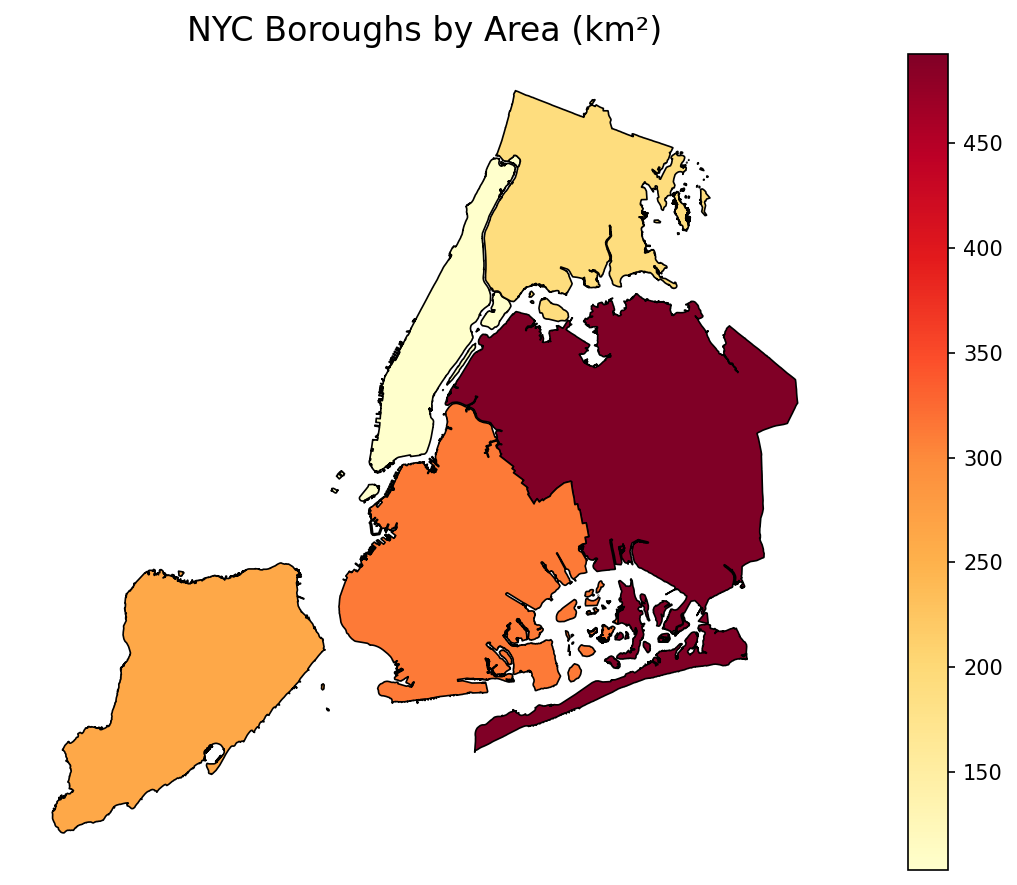

In [17]:
# Create a choropleth map showing borough areas
fig, ax = plt.subplots(figsize=(10,6))

nyc_boroughs_3857.plot(
    column="Area_km2",
    cmap="YlOrRd", # Yellow-Orange-Red color map
    legend=True,
    edgecolor="black",
    ax=ax,
    linewidth=0.8
)

plt.title("NYC Boroughs by Area (km²)", fontsize=16)
plt.axis("off") # Remove axis for cleaner look
plt.tight_layout()
plt.show()

การวาดภาพ **"ซ้อนเลเยอร์" (Multi-Layer Visualization)** ครับ เหมือนกับการวางแผ่นใสทับกันหลายๆ ชั้นเพื่อให้แผนที่แผ่นเดียวบอกข้อมูลได้ครบถ้วนที่สุด

---

## **การวาดแผนที่แบบหลายเลเยอร์ (Multi-Layer)**

ในโลกของ GIS เรามักจะไม่วาดข้อมูลแค่ประเภทเดียว แต่จะเอา **พื้นที่ (Polygon)**, **จุด (Point)** และ **ตัวหนังสือ (Label)** มาวางซ้อนกันเพื่อให้ดูง่ายครับ

### **องค์ประกอบของแผนที่นี้**

ในโค้ดตัวอย่างมีการซ้อนกันทั้งหมด 3 ชั้น ดังนี้:

1. **ชั้นฐาน (Base Layer):** วาดรูปทรงเขต (geometry) โดยใช้สีฟ้าอ่อน (`lightblue`) เพื่อเป็นฉากหลัง
2. **ชั้นจุด (Point Layer):** นำ **Centroid** (จุดกึ่งกลาง) ที่เราสกัดไว้ก่อนหน้านี้มาวาดทับลงไปเป็นจุดสีแดง เพื่อแสดงตำแหน่งศูนย์กลางของแต่ละเขต
3. **ชั้นข้อมูลตัวอักษร (Annotation Layer):** ใช้การวนลูป (`iterrows`) เพื่อเอาชื่อเขตไปแปะไว้ตรงพิกัดของจุดกึ่งกลางพอดี พร้อมใส่กรอบสีขาวให้ดูลอยออกมาจากแผนที่

---

### **ทำไมต้องทำหลายชั้น?**

* **ความชัดเจน:** การใส่ชื่อเขต (Label) ช่วยให้คนดูไม่ต้องเดาว่าเขตไหนชื่ออะไร
* **การวิเคราะห์ซ้อน:** เราสามารถเห็นได้ทันทีว่า "จุดกึ่งกลาง" ของเขตนั้นตั้งอยู่ตรงไหนเมื่อเทียบกับรูปร่างของพื้นที่ทั้งหมด
* **ความเป็นมืออาชีพ:** แผนที่ที่มีทั้งขอบเขต จุดอ้างอิง และชื่อเรียก จะดูเป็น "แผนที่จริง" มากกว่าแค่รูปทรงเรขาคณิตเปล่าๆ ครับ

---



ยินดีด้วยครับ! คุณได้เรียนรู้ทักษะสำคัญของ **Geospatial Data Scientist** ไปแล้ว ซึ่งสรุปได้เป็น 4 ขั้นตอนหลัก:

1. **Prepare:** ติดตั้งและอ่านไฟล์ (GeoJSON, Shapefile)
2. **Process:** จัดการระบบพิกัด (CRS) ให้ถูกต้องแม่นยำ
3. **Analyze:** คำนวณพื้นที่, ระยะทาง และหาจุดกึ่งกลาง
4. **Visualize:** วาดแผนที่ระบายสี และซ้อนเลเยอร์ให้น่าสนใจ

---

**จบเนื้อหาพื้นฐานของ GeoPandas แล้วครับ!** ตอนนี้คุณพร้อมที่จะนำข้อมูลแผนที่ในไทย (เช่น ขอบเขตจังหวัด หรือตำแหน่งรถไฟฟ้า) มาวิเคราะห์เองแล้ว **อยากให้ผมสรุปคำสั่งทั้งหมดเป็น "สรุปสั้นๆ (Cheat Sheet)" หรืออยากให้ลองเขียนโค้ดวิเคราะห์ข้อมูลจริงในไทยดูสักตัวอย่างไหมครับ?**

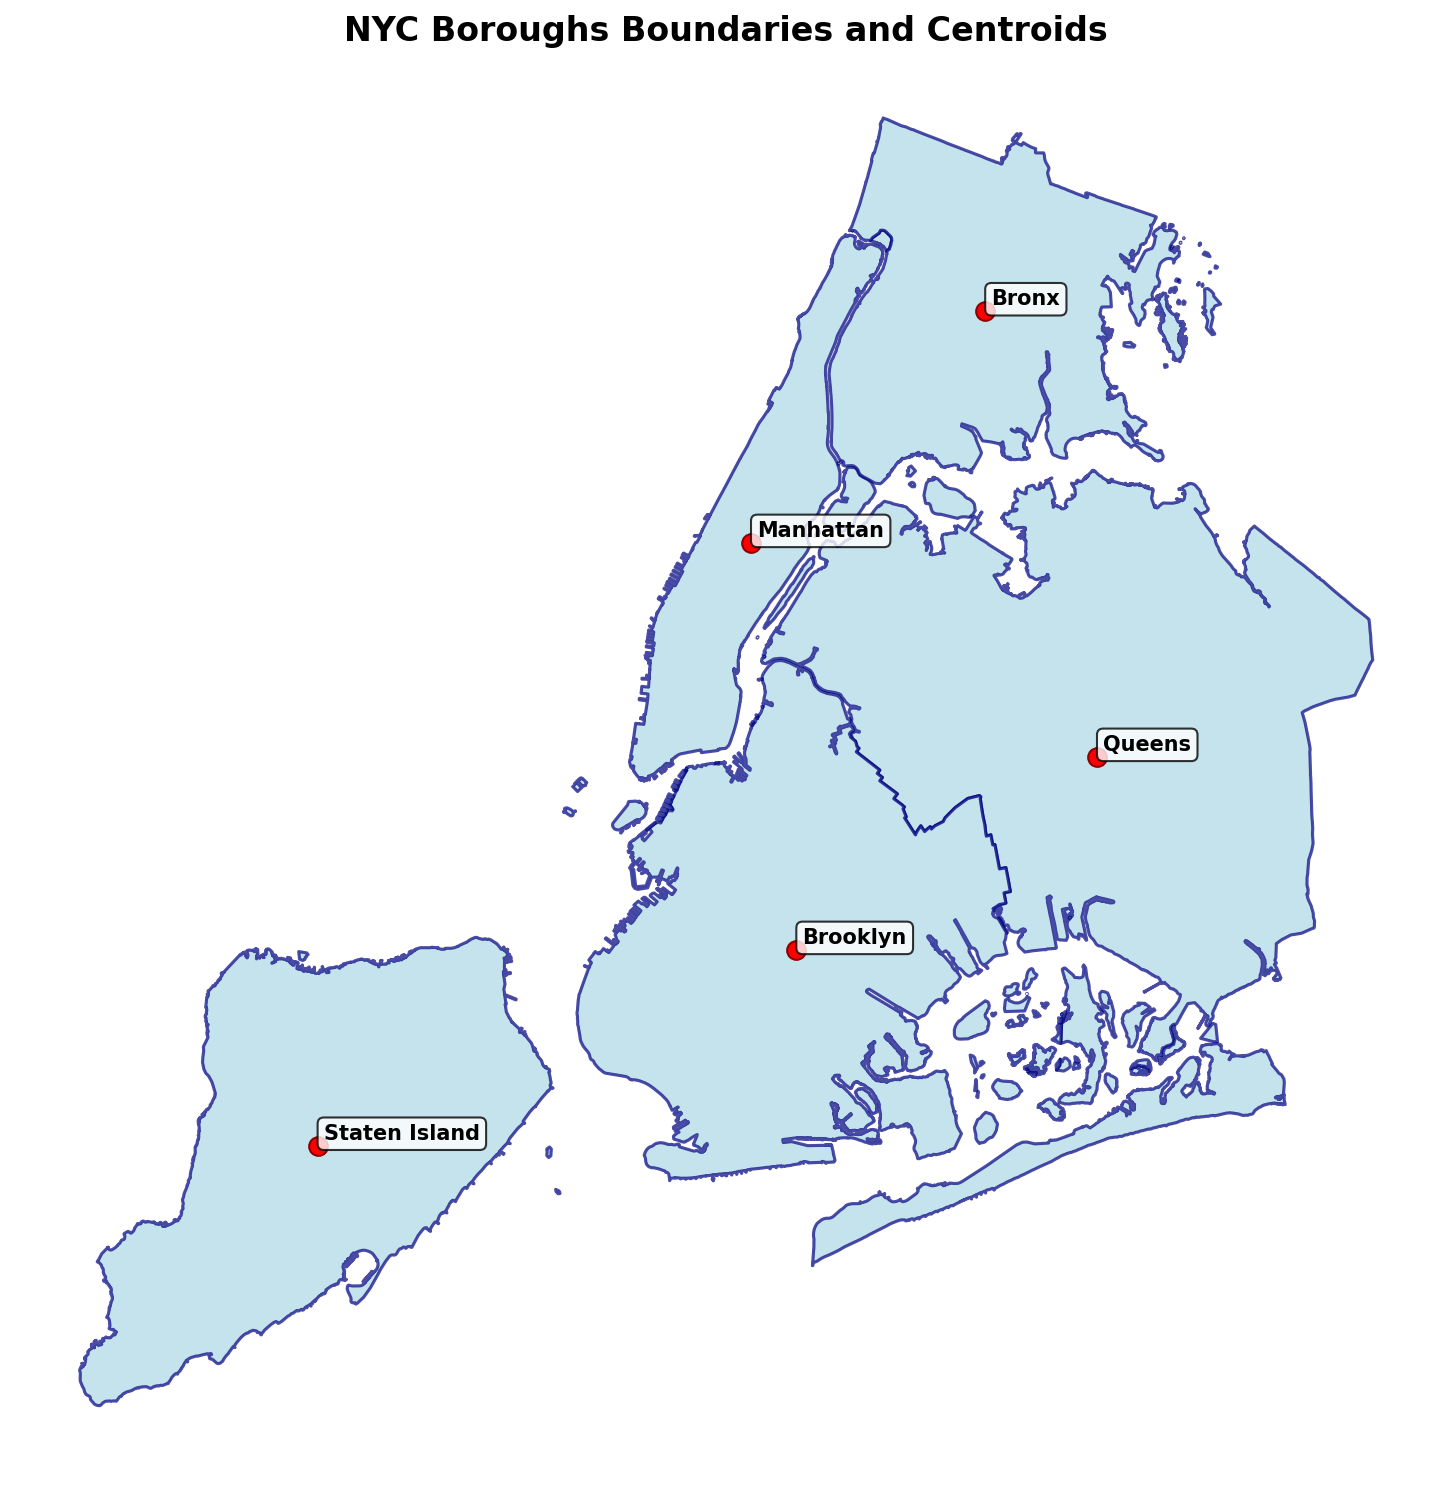

In [22]:
# Create a comprehensive map with multiple layers
fig, ax = plt.subplots(figsize=(10,10))

# Plot borough boundaries as base layer
nyc_boroughs_3857["geometry"].plot(
    ax=ax,
    color="lightblue",
    edgecolor="navy",
    linewidth=1.5,
    alpha=0.7
)

# Add centroid as point layer
nyc_boroughs_3857["centroid"].plot(
    ax=ax,
    color="red",
    markersize=80,
    edgecolor="darkred",
    linewidth=1
)

# Add borough labels
for idx, row in nyc_boroughs_3857.iterrows():
    ax.annotate(
        text=idx,
        xy=(row["centroid"].x, row["centroid"].y),
        xytext=(3,3),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
    )

plt.title("NYC Boroughs Boundaries and Centroids", fontsize=16, fontweight="bold")
plt.axis("off") # Remove axis for cleaner look
plt.tight_layout()
plt.show()

การสร้างแผนที่แบบ **"โต้ตอบได้" (Interactive Visualization)** ครับ ซึ่งเป็นจุดเด่นที่ทำให้การนำเสนอข้อมูลของคุณดู "ว้าว" และใช้งานได้จริงมากขึ้น

---

## **แผนที่แบบโต้ตอบได้ (Interactive Visualization)**

ในขั้นตอนการวิเคราะห์ข้อมูล การใช้แผนที่ภาพนิ่ง (Static) อาจจะไม่จุใจพอ GeoPandas เลยเตรียมคำสั่ง `.explore()` มาให้ ซึ่งจะเปลี่ยนแผนที่ธรรมดาให้กลายเป็นแผนที่แบบที่เราใช้ใน Google Maps ครับ

### **ทำไมต้องใช้แผนที่ Interactive?**

* **ซูมเข้า-ออกได้:** ดูรายละเอียดได้ทั้งภาพรวมเมืองและเจาะลึกไปถึงระดับซอย
* **ดูข้อมูลด้วยการเอาเมาส์วาง (Tooltip):** แค่เลื่อนเมาส์ไปวางที่เขตนั้นๆ ข้อมูลที่เราเลือกไว้ (เช่น พื้นที่ หรือระยะทาง) ก็จะเด้งขึ้นมาทันที
* **ดูรายละเอียดด้วยการคลิก (Popup):** คลิกเพื่อดูตารางข้อมูลทั้งหมดของเขตนั้นได้เลย
* **มีแผนที่ฐาน (Base Map):** มันจะเอาข้อมูลเราไปวางทับบนแผนที่จริงๆ ของโลก (เช่น แผนที่ถนน หรือดาวเทียม)

### **โค้ดตัวอย่าง**

```python
# สร้างแผนที่ที่โต้ตอบได้ในบรรทัดเดียว!
m = gdf.explore(
    column="area_km2",            # ระบายสีตามขนาดพื้นที่
    cmap="YlOrRd",                # ใช้โทนสี เหลือง-ส้ม-แดง
    tooltip=["BoroName", "area_km2"], # เอาเมาส์วางแล้วเห็นชื่อเขตและพื้นที่
    popup=True,                    # คลิกแล้วมีข้อมูลโชว์
    legend=True                    # แสดงแถบสี
)
m  # พิมพ์ m เพื่อแสดงแผนที่

```

---



In [28]:
# Create an interactive map using Folium integration 
m =  nyc_boroughs_3857.explore(
    column="Area_km2",
    cmap="YlOrRd",
    legend=True,
    tooltip=["Area_km2", "Distance_to_Manhattan_km"],
    popup=True,
    
)

m

---

## **การวิเคราะห์ทางเรขาคณิตขั้นสูง**

ในบางครั้ง การรู้แค่ขอบเขตพื้นที่อาจไม่พอ แต่เราอยากรู้ว่า **"ถ้ารัศมีห่างออกไปอีกเท่านี้ จะครอบคลุมถึงไหน?"** นี่คือที่มาของคำสั่ง `buffer` ครับ

### **Buffer Analysis (การสร้างพื้นที่รัศมีรอบวัตถุ)**

การทำ Buffer คือการ "ขยายร่าง" ของวัตถุเดิมออกไปตามระยะที่เรากำหนด ไม่ว่าวัตถุเดิมจะเป็น จุด, เส้น หรือพื้นที่ ผลลัพธ์ที่ได้จะเป็นพื้นที่รอบวัตถุนั้นเสมอ

**ตัวอย่างการใช้งาน:**

* **สร้างโซนอันตราย:** เช่น ถ้ามีโรงงานสารเคมีรั่วไหล รัศมี 3 กม. รอบโรงงานคือตรงไหนบ้าง?
* **การเข้าถึงบริการ:** พื้นที่ไหนบ้างที่อยู่ในรัศมีเดินเท้า 500 เมตรจากสถานีรถไฟฟ้า?
* **สิ่งแวดล้อม:** กำหนดเขตห้ามก่อสร้างห่างจากแม่น้ำ 100 เมตร

---

### **โค้ดและการทำงาน**

สมมติว่าเราต้องการสร้างโซนกันชนรอบเขตปกครองของนิวยอร์กออกไป **3 กิโลเมตร**:

```python
# 1. กำหนดระยะ (หน่วยต้องตรงกับ CRS ของข้อมูล เช่น เมตร)
buffer_distance = 3000 

# 2. ใช้คำสั่ง .buffer() เพื่อสร้างรูปทรงใหม่ที่ขยายออกมา
gdf["buffered"] = gdf.buffer(buffer_distance)

```

**สิ่งที่เกิดขึ้น:**

* GeoPandas จะสร้างคอลัมน์ใหม่ชื่อ `buffered` ซึ่งเก็บรูปทรงที่ "บวม" ออกมาจากเดิม 3,000 เมตร
* เมื่อเราเอามาวาดรูปซ้อนกัน (ดังรูป Figure 16) เราจะเห็นพื้นที่เดิม (สีฟ้า) และพื้นที่กันชน (สีส้ม) ที่แผ่ออกไปรอบๆ อย่างชัดเจน

---

### **สรุปประโยชน์ของ Buffer:**

1. **วางแผนฉุกเฉิน:** กำหนดโซนอพยพ
2. **การเข้าถึงบริการ:** หาพื้นที่ที่ "ใกล้พอ" จะเข้าถึงบริการต่างๆ
3. **วิเคราะห์ผลกระทบ:** ดูว่ามลพิษหรือเสียงดังจากจุดหนึ่งจะแผ่ไปโดนใครบ้าง

---



In [19]:
# Create 3 kilometer buffer zones around each borough
buffer_distance = 3000  # in meters
nyc_boroughs_3857["buffer_3km"] = nyc_boroughs_3857.buffer(buffer_distance)

print(f"Created {buffer_distance/1000} km buffers around each borough.")

Created 3.0 km buffers around each borough.


C:\Users\thammarat\AppData\Local\Temp\ipykernel_10140\2374490714.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")
C:\Users\thammarat\AppData\Local\Temp\ipykernel_10140\2374490714.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


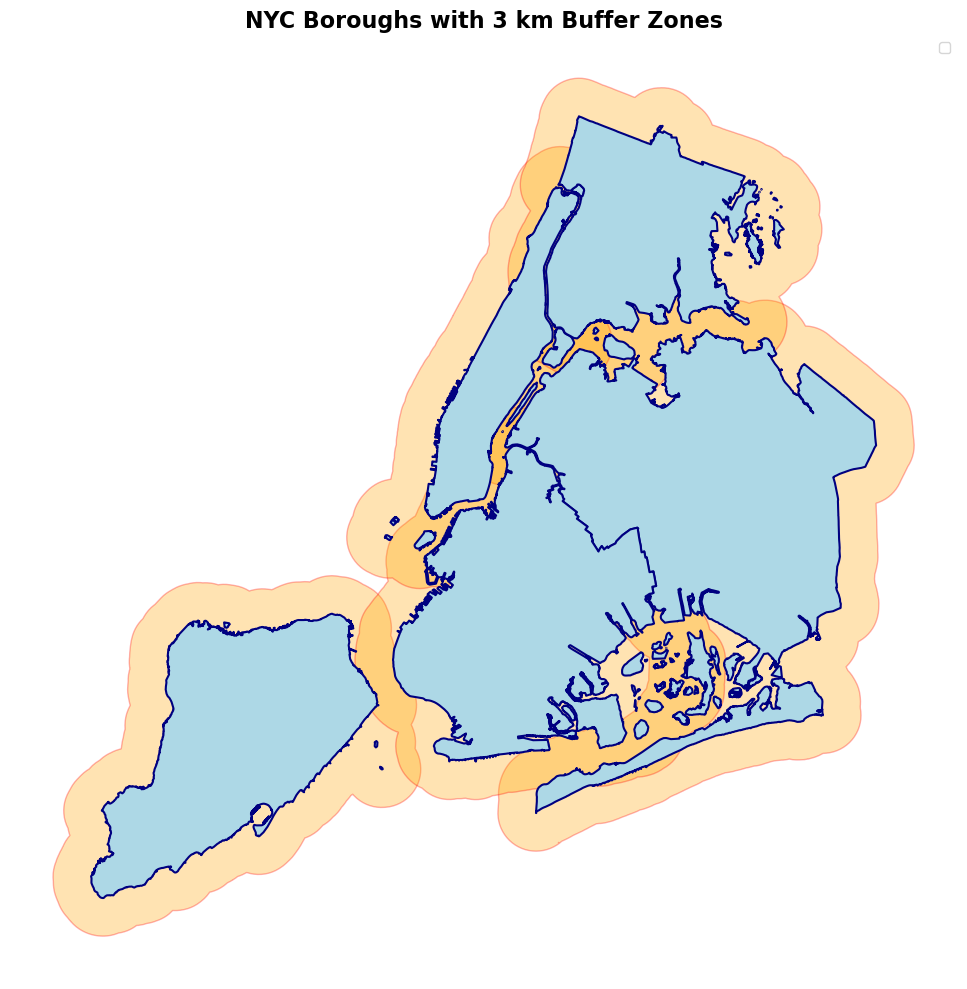

In [20]:
# Visualize original vs buffered geometries
fig, ax = plt.subplots(figsize=(10,10))

# Plot buffered areas first (background)
nyc_boroughs_3857["buffer_3km"].plot(
    ax=ax,
    alpha=0.3,
    color="orange",
    edgecolor="red",
    linewidth=1,
    label="3 km Buffer Zone",
)

# Plot original borough boundaries on top
nyc_boroughs_3857["geometry"].plot(
    ax=ax,
    color="lightblue",
    edgecolor="navy",
    linewidth=1.5,
    label="Borough Boundaries",
)

plt.title("NYC Boroughs with 3 km Buffer Zones", fontsize=16, fontweight="bold")
plt.axis("off") # Remove axis for cleaner look
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## **การวิเคราะห์ Convex Hull (การหาพื้นที่ห่อหุ้มที่เล็กที่สุด)**

ลองนึกภาพว่าคุณเอาตะปูไปปักไว้ตามขอบเขตของเขตปกครองต่างๆ แล้วเอา **"หนังยาง"** วงใหญ่มาคล้องรอบตะปูเหล่านั้น หนังยางจะดีดตัวกลับมาโอบล้อมตะปูทุกตัวจนตึงพอดี รูปทรงที่ได้นั่นแหละครับคือ **Convex Hull**

### **Convex Hull คืออะไร?**

* คือรูปทรงนูนที่ **เล็กที่สุด** ที่สามารถครอบคลุมทุกส่วนของวัตถุนั้นๆ ได้
* มันจะช่วยกำจัดส่วนที่ "เว้า" หรือ "โค้งเข้า" ออกไป ให้กลายเป็นรูปทรงที่เรียบง่ายที่สุด

---

### **การวิเคราะห์ความซับซ้อนของพื้นที่ (Area Ratio)**

เทคนิคการเช็คว่า "พื้นที่ของเรามีรูปร่างหยักหรือซับซ้อนแค่ไหน" โดยการเปรียบเทียบพื้นที่จริงกับ Convex Hull:

1. **คำนวณ Convex Hull:** ใช้คำสั่ง `gdf.convex_hull`
2. **คำนวณอัตราส่วน (Ratio):** เอาพื้นที่จริง หารด้วย พื้นที่ Convex Hull
* **ถ้าค่าใกล้ 1.0:** แสดงว่ารูปทรงนั้นค่อนข้างเรียบง่าย กลมๆ มนๆ ไม่ค่อยมีส่วนเว้า (เหมือนรูปวงกลมหรือสี่เหลี่ยม)
* **ถ้าค่าน้อยกว่า 1.0 มากๆ:** แสดงว่ารูปทรงนั้น **ซับซ้อนมาก** มีแหลม มีเว้า มีส่วนโค้งเข้าออกเยอะ (เช่น เขตที่มีเกาะแก่งหรือชายฝั่งหยัก)



---

### **โค้ดตัวอย่างและการวาดภาพ**

```python
# 1. สร้าง Convex Hull
gdf["convex_hull"] = gdf.convex_hull

# 2. คำนวณหาค่าความซับซ้อน
gdf["area_ratio"] = gdf["area_km2"] / (gdf["convex_hull"].area / 1_000_000)

```

เวลาเราวาดรูปเปรียบเทียบ  เราจะเห็นเส้นประสีแดงล้อมรอบเขตสีฟ้า:

* ส่วนไหนที่แผนที่เดิม "เว้าเข้า" เส้น Convex Hull จะข้ามตรงนั้นไปเป็นเส้นตรง
* ช่วยให้เราเห็น "ขอบเขตที่กว้างที่สุด" ของพื้นที่นั้นๆ ครับ

---

### **ประโยชน์ของ Convex Hull:**

* **Shape Analysis:** ใช้จำแนกประเภทพื้นที่ตามความซับซ้อนของรูปร่าง
* **Spatial Indexing:** ช่วยให้คอมพิวเตอร์ค้นหาตำแหน่งได้เร็วขึ้น เพราะการคำนวณบนรูปทรงเรียบง่าย (Convex) ทำได้เร็วกว่ารูปทรงหยักๆ
* **Collision Detection:** ในงานวางแผนเส้นทาง บางครั้งเราใช้ Convex Hull เพื่อดูขอบเขตคร่าวๆ ของสิ่งกีดขวาง

---



In [22]:
# Calculate convex hulls for each borough
nyc_boroughs_3857["convex_hull"] = nyc_boroughs_3857.convex_hull

# Compare areas between original shapes and convex hulls
nyc_boroughs_3857["convex_hull_area_km2"] = nyc_boroughs_3857["convex_hull"].area / 1_000_000
nyc_boroughs_3857["area_ration"]= nyc_boroughs_3857["convex_hull_area_km2"] / nyc_boroughs_3857["Area_km2"]

print("Convex Hull Analysis:")
print(nyc_boroughs_3857[["Area_km2", "convex_hull_area_km2", "area_ration"]].round(2))

Convex Hull Analysis:
               Area_km2  convex_hull_area_km2  area_ration
BoroName                                                  
Staten Island    261.80                332.55         1.27
Queens           492.83                845.79         1.72
Brooklyn         312.97                405.32         1.30
Manhattan        103.22                178.16         1.73
Bronx            192.93                269.55         1.40


C:\Users\thammarat\AppData\Local\Temp\ipykernel_10140\1420552354.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")
C:\Users\thammarat\AppData\Local\Temp\ipykernel_10140\1420552354.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


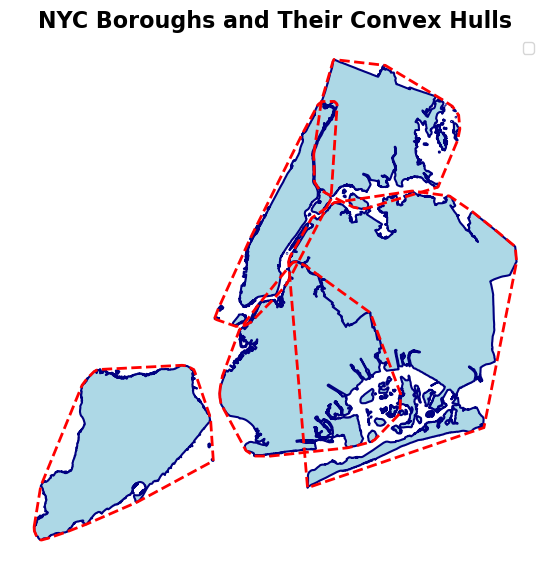

In [23]:
# Create comprison visualization
fig, ax = plt.subplots(figsize=(10,6))

# Plot original geometries
nyc_boroughs_3857["geometry"].plot(
    ax=ax,
    color="lightblue",
    edgecolor="navy",
    linewidth=1.5,
    label="Borough Boundaries",
)

# Plot convex hulls as outlines
nyc_boroughs_3857["convex_hull"].plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=2,
    linestyle="--",
    label="Convex Hull",
)

plt.title("NYC Boroughs and Their Convex Hulls", fontsize=16, fontweight="bold")
plt.axis("off") # Remove axis for cleaner look
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

เนื้อหาหัวข้อนี้คือการหา **"ความสัมพันธ์เชิงพื้นที่"** ครับ เป็นการตั้งคำถามกับโปรแกรมว่า วัตถุสองอย่างบนแผนที่มัน "เกี่ยวข้องกัน" อย่างไรบ้าง เช่น ทับกันไหม? ติดกันไหม? หรืออยู่ในเขตเดียวกันหรือเปล่า?

---

## **ความสัมพันธ์และการคัดกรองเชิงพื้นที่ (Spatial Relationships)**

GeoPandas มีฟังก์ชันที่เหมือนเป็น "คำถาม" ให้เราเช็คความสัมพันธ์ระหว่าง 2 พื้นที่ได้ง่ายๆ โดยผลลัพธ์ที่ได้จะเป็นค่า **True (ใช่)** หรือ **False (ไม่ใช่)** ครับ

### **1. Intersection (การตัดกัน/ทับกัน)**

คำสั่ง `.intersects()` ใช้ถามว่า **"พื้นที่สองส่วนนี้มีส่วนไหนที่ทับซ้อนกันบ้างไหม?"**

* **ตัวอย่างในบทเรียน:** เราลองเอา "พื้นที่รัศมีกันชน (Buffer)" ของเขตต่างๆ มาเช็คว่ามันไปทับกับ "พื้นที่เขต Manhattan" หรือไม่
* **ประโยชน์:** ใช้หาว่าใครได้รับผลกระทบจากโซนที่เรากำหนดไว้บ้าง เช่น "บ้านหลังไหนอยู่ในรัศมีเวนคืนที่ดินบ้าง?"

### **2. Touches (การสัมผัสกัน)**

คำสั่ง `.touches()` ใช้ถามว่า **"พื้นที่สองส่วนนี้มีขอบติดกันพอดี แต่ไม่ได้ทับกันใช่ไหม?"**

* **ตัวอย่างในบทเรียน:** ใช้เช็คว่าเขตไหนบ้างที่มีพรมแดนติดกับ Manhattan (เป็นเพื่อนบ้านกัน)
* **ประโยชน์:** ใช้หาเขตติดต่อหรือพรมแดนระหว่างจังหวัด/ประเทศ

---

### **โค้ดและการทำงาน**

```python
# 1. ดึงรูปทรงของ Manhattan ออกมาเป็นตัวตั้งต้น
manhattan_geom = gdf.loc["Manhattan", "geometry"]

# 2. ถามว่า: พื้นที่ Buffer ของแต่ละเขต ทับกับ Manhattan ไหม?
gdf["intersects_manhattan"] = gdf["buffered"].intersects(manhattan_geom)

# 3. ถามว่า: ขอบเขตจริงๆ ของแต่ละเขต ติดกับ Manhattan ไหม?
gdf["touches_manhattan"] = gdf["geometry"].touches(manhattan_geom)

```

---

### **ทำไมการวิเคราะห์แบบนี้ถึงสำคัญ?**

การใช้คำสั่งเหล่านี้ช่วยให้เรา "คัดกรองข้อมูล" (Spatial Query) ได้แม่นยำมากครับ:

* **การตลาด:** "ลูกค้าคนไหนบ้างที่อาศัยอยู่ในรัศมี 5 กม. จากห้างของเรา?" (Intersects)
* **สิ่งแวดล้อม:** "แปลงที่ดินไหนบ้างที่มีเขตติดต่อกับอุทยานแห่งชาติ?" (Touches)
* **คมนาคม:** "ถนนเส้นไหนบ้างที่ตัดผ่านเขตสีแดง?" (Intersects)

---



In [24]:
# Test which buffered boroughs intersect with Manhattan's original boundary
manhattan_geom = nyc_boroughs_3857.loc["Manhattan", "geometry"]

nyc_boroughs_3857["intersects_manhattan"] = nyc_boroughs_3857["buffer_3km"].intersects(manhattan_geom)
nyc_boroughs_3857["touches_manhattan"] = nyc_boroughs_3857["geometry"].touches(manhattan_geom)

# Display results
intersection_results = nyc_boroughs_3857[["intersects_manhattan", "touches_manhattan"]]
intersection_results

intersects_manhattan  touches_manhattan
BoroName                                              
Staten Island                 False              False
Queens                         True               True
Brooklyn                       True               True
Manhattan                      True              False
Bronx                          True               True

การ **"ตรวจสอบความถูกต้อง"** ของข้อมูลครับ โดยใช้ความสัมพันธ์ที่เรียกว่า **Containment (การบรรจุอยู่ภายใน)** เพื่อเมคชัวร์ว่าข้อมูลแผนที่ของเราไม่ได้ทำงานผิดพลาด

---

## **การตรวจสอบการบรรจุอยู่ภายใน (Containment)**

ในการทำแผนที่ บางครั้งเราอาจจะคำนวณพิกัดผิดจนจุดกระโดดออกไปนอกพื้นที่ที่ควรจะเป็น คำสั่ง `.within()` จึงถูกนำมาใช้เพื่อเช็คว่า **"จุดนี้ (หรือพื้นที่นี้) อยู่ข้างในพื้นที่ที่เรากำหนดไว้ 100% หรือไม่"**

### **ทำไมต้องตรวจแบบนี้?**

ลองนึกภาพว่าคุณหา "จุดกึ่งกลาง (Centroid)" ของเขตกรุงเทพฯ แต่จุดดันไปโผล่ที่ฉะเชิงเทรา แบบนี้แสดงว่าข้อมูลมีปัญหาแล้วครับ การเช็คแบบนี้จึงเป็นการทำ **Data Quality Assurance (QA)** หรือการประกันคุณภาพข้อมูลนั่นเอง

### **โค้ดและการทำงาน**

ในบทเรียนนี้ เราจะทดสอบว่า "จุดกึ่งกลางของแต่ละเขต (Centroid)" นั้นอยู่ภายใน "ขอบเขตพื้นที่ของเขตนั้น (Geometry)" จริงหรือไม่:

```python
# ถามว่า: จุดกึ่งกลาง อยู่ใน ขอบเขตของเขตตัวเอง ใช่ไหม?
gdf["centroid_within_borough"] = gdf["centroid"].within(gdf["geometry"])

# หาแถวที่มีปัญหา (ค่าเป็น False)
anomalies = gdf[~gdf["centroid_within_borough"]]

```

* **`within()`**: เช็คว่าตัวตั้งต้น อยู่ **ข้างใน** ตัวที่อยู่ในวงเล็บหรือไม่
* **สัญลักษณ์ `~**`: หมายถึง "ไม่ใช่" (ใช้เพื่อหาแถวที่ผลลัพธ์ออกมาเป็น False หรือก็คือจุดที่กระเด็นออกไปข้างนอกนั่นเอง)

---

### **ประโยชน์ของการเช็ค Containment**

1. **ตรวจสอบคุณภาพข้อมูล:** ป้องกันความผิดพลาดจากการคำนวณหรือการนำเข้าข้อมูล
2. **การจัดกลุ่มข้อมูล:** เช่น "บ้านหลังนี้อยู่ภายในเขตเทศบาลหรือไม่?" เพื่อคำนวณภาษีที่แตกต่างกัน
3. **ความปลอดภัย:** "เครื่องบินลำนี้ยังอยู่ภายในน่านฟ้าที่กำหนดไว้หรือไม่?"

**สรุปสั้นๆ:** ถ้าคำนวณแล้วทุกอย่างถูกต้อง ผลลัพธ์ควรจะออกมาเป็น **True** ทั้งหมด เหมือนกับตัวอย่างในนิวยอร์กที่ระบบขึ้นเครื่องหมายถูกให้เราครับ



In [25]:
# Verify that centroids fall within their respective borough boundaries
nyc_boroughs_3857["centroid_within"] = nyc_boroughs_3857["centroid"].within(nyc_boroughs_3857["geometry"])

# Check for any anomalies
anomalies = nyc_boroughs_3857[~nyc_boroughs_3857["centroid_within"]]
if len(anomalies) == 0:
    print("All centroids are correctly located within their borough boundaries.")
else:
    print("Some centroids are not located within their borough boundaries:")
    print(anomalies)

All centroids are correctly located within their borough boundaries.


บทสุดท้ายของบทนี้คือ **"ข้อแนะนำที่ควรทำ" (Best Practices)** เพื่อให้งานวิเคราะห์ข้อมูลแผนที่ของคุณถูกต้อง แม่นยำ และรวดเร็วครับ ผมสรุปหัวใจสำคัญมาให้แบบเข้าใจง่าย ดังนี้ครับ:

---

## **ข้อแนะนำเพื่อประสิทธิภาพสูงสุด (Best Practices)**

การทำแผนที่ไม่ได้มีแค่การวาดรูป แต่คือการจัดการข้อมูลให้ "เป๊ะ" ครับ

### **1. การจัดการระบบพิกัด (CRS Management)**

* **เช็คก่อนเสมอ:** ทุกครั้งที่โหลดไฟล์ใหม่ ให้ใช้ `.crs` เช็คพิกัดก่อน เพราะถ้าพิกัดคนละระบบ ข้อมูลจะวางไม่ทับกัน
* **เลือกใช้ให้ถูกงาน:** * อยากโชว์แผนที่โลกหรือใช้บนเว็บ ➔ ใช้ **องศา (Geographic)**
* อยากวัดพื้นที่หรือระยะทาง ➔ ใช้ **เมตร/ฟุต (Projected)**


* **จดบันทึกไว้:** บอกคนอื่นเสมอว่าข้อมูลนี้ใช้พิกัดรหัสอะไร (เช่น EPSG:32647)

### **2. หน่วยความจำและการประมวลผล (Performance)**

* **กรองข้อมูลก่อน:** ถ้าไฟล์ใหญ่เกินไป ให้เลือกเฉพาะแถวหรือคอลัมน์ที่ต้องใช้ จะช่วยให้คอมพิวเตอร์ทำงานเร็วขึ้นมาก
* **ใช้ดัชนีเชิงพื้นที่ (Spatial Index):** หากต้องคำนวณจุดตัดจำนวนมหาศาล การเปิดใช้ `sindex` จะช่วยให้ประมวลผลเร็วขึ้นหลายเท่า

### **3. การตรวจสอบความถูกต้อง (Data Validation)**

* **เช็คว่ารูปทรง "เสีย" ไหม:** บางครั้งไฟล์แผนที่อาจมีเส้นทับกันเองจนคำนวณไม่ได้ ให้ใช้ `gdf.is_valid` ตรวจสอบ
* **ระวังพื้นที่ว่าง:** เช็คว่ามีแถวไหนที่ไม่มีรูปทรง (Empty Geometries) หรือไม่ก่อนเริ่มคำนวณ

---

## **16.13 สรุปสาระสำคัญ (Key Takeaways)**

GeoPandas คือสะพานเชื่อมระหว่าง **"งานแผนที่ (GIS)"** กับ **"วิทยาศาสตร์ข้อมูล (Data Science)"** ครับ

1. **ตารางสุดล้ำ:** มันคือ Pandas ที่เก็บรูปทรง (จุด, เส้น, พื้นที่) ไว้ในตารางเดียวกันได้
2. **พิกัดคือหัวใจ:** การจัดการ CRS ที่ถูกต้องคือความลับของความแม่นยำ
3. **เครื่องมือครบเครื่อง:** จะวัดพื้นที่ สร้างโซนรัศมี (Buffer) หรือหาจุดทับซ้อน (Intersection) ก็ทำได้ในไม่กี่บรรทัด
4. **ภาพสวยและโต้ตอบได้:** วาดแผนที่นิ่งๆ ก็ดี หรือจะทำแผนที่ซูมเข้า-ออกได้แบบ Google Maps ก็ง่าย
5. **ใช้งานได้จริง:** เหมาะกับทุกคน ตั้งแต่นักผังเมือง นักวิจัยสิ่งแวดล้อม ไปจนถึงนักวิเคราะห์ธุรกิจ

---

**ยินดีด้วยครับ! คุณอ่านจบทั้งบทแล้ว** 🥳
GeoPandas จะเปลี่ยนวิธีที่คุณมองข้อมูลพิกัดไปตลอดกาล จากเดิมที่เป็นแค่ตัวเลขละติจูด/ลองจิจูดที่อ่านยาก ให้กลายเป็นภาพวิเคราะห์ที่ทรงพลังครับ



# Exercises

In [3]:
import pandas as pd            # สำหรับจัดการตารางข้อมูลทั่วไป
import geopandas as gpd        # สำหรับจัดการข้อมูลแผนที่ (ตัวพระเอก)
import matplotlib.pyplot as plt # สำหรับวาดรูปและแสดงผลแผนที่

In [4]:
buildings_url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
nyc_buildings = gpd.read_file(buildings_url)
nyc_buildings.head()

fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
0    2      15.05      23.30       19.18   6365.72      36  New York   
1    4      23.62      46.18       34.90   3287.84      36  New York   
2    5      19.98     109.60       64.79   2011.21      36  New York   
3    9      18.50      18.18       18.34   3110.32      36  New York   
4   34      21.53      32.84       27.18   5240.89      36  New York   

                                            geometry  
0  POLYGON ((-74.00129 40.71992, -74.00061 40.719...  
1  POLYGON ((-74.0032 40.71654, -74.00265 40.7163...  
2  POLYGON ((-74.01415 40.70324, -74.01342 40.703...  
3  POLYGON ((-73.98974 40.71924, -73.98924 40.720...  
4  POLYGON ((-74.00941 40.72351, -74.00816 40.723...

In [5]:
print(f"Current CRS: {nyc_buildings.crs}")

Current CRS: EPSG:4326


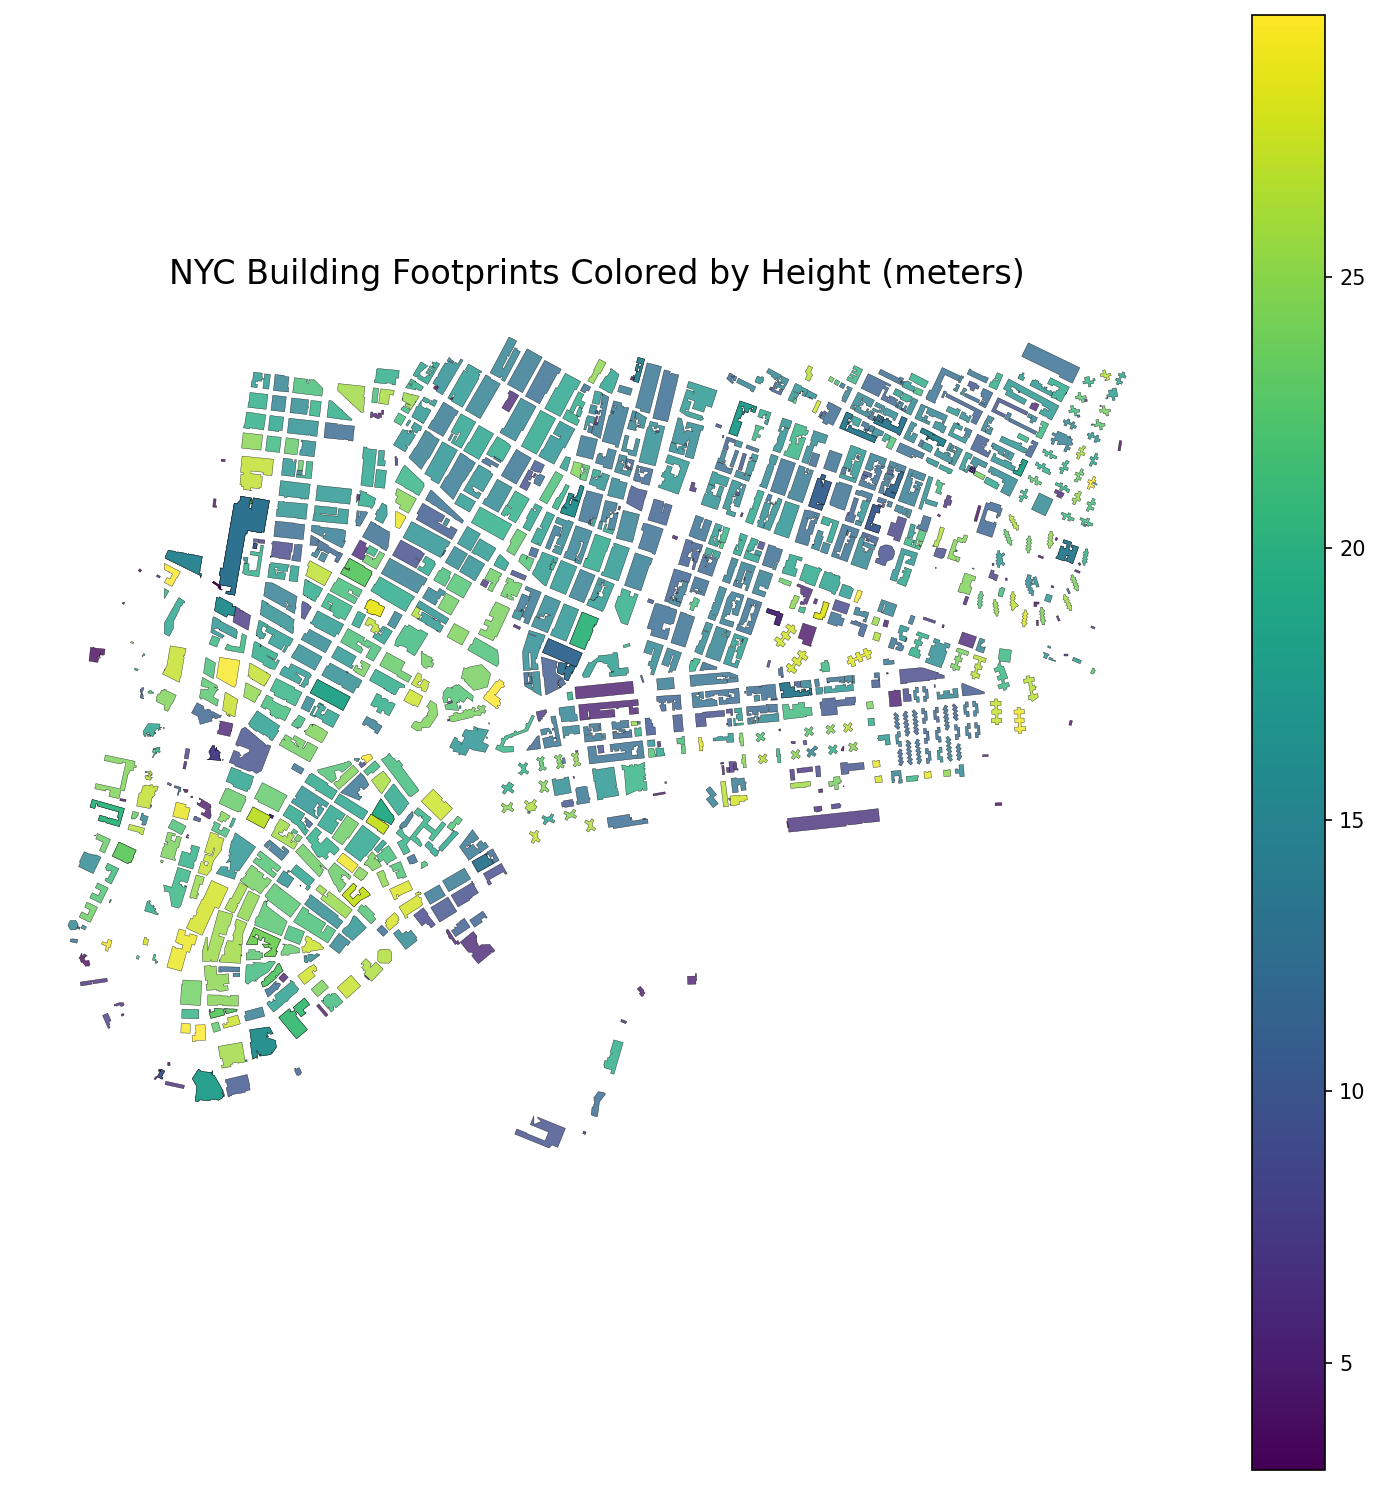

In [29]:
# Create a plot of the buildings footprints and color them based on the building height
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

nyc_buildings.plot(
    column="height_MS",
    cmap="viridis",
    legend=True,
    figsize=(10,10),
    edgecolor="black",
    linewidth=0.2,
    alpha=0.8
)
plt.title("NYC Building Footprints Colored by Height (meters)", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


In [31]:
# Create an interactive map with custom markers
m_buildings = nyc_buildings.explore(
    column="height_MS",
    cmap="viridis",
    legend=True,
    tooltip=["height_MS", "height_avg"],
    popup=True,
    marker_type="circle",
    marker_kwds={"radius": 3, "fillOpacity": 0.7, "color": "black", "weight": 0.5},
)
m_buildings

In [6]:
avg_height = nyc_buildings['height_MS'].mean()
print(f"ความสูงเฉลี่ยของอาคาร: {avg_height:.2f} เมตร")

ความสูงเฉลี่ยของอาคาร: 15.45 เมตร


In [7]:
tall_buildings = nyc_buildings[nyc_buildings['height_MS'] > avg_height]
print(f"พบอาคารที่สูงกว่าค่าเฉลี่ยทั้งหมด: {len(tall_buildings)} แห่ง")

พบอาคารที่สูงกว่าค่าเฉลี่ยทั้งหมด: 524 แห่ง


In [8]:
tall_buildings.to_file("tall_nyc_buildings.geojson", driver="GeoJSON")

# EX2

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)

In [10]:
df_filtered = df[(df['latitude'] >= -40) & (df['latitude'] <= 60)]

In [11]:
geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry, crs="EPSG:4326")

In [12]:
gdf_3857 = gdf.to_crs(epsg=3857)

In [13]:
# ค้นหาตำแหน่งปารีสในหน่วยเมตร
paris = gdf_3857[gdf_3857['name'] == 'Paris'].geometry.iloc[0]

# คำนวณระยะทาง (ผลลัพธ์จะเป็นเมตร)
gdf_3857['dist_to_paris'] = gdf_3857.geometry.distance(paris)

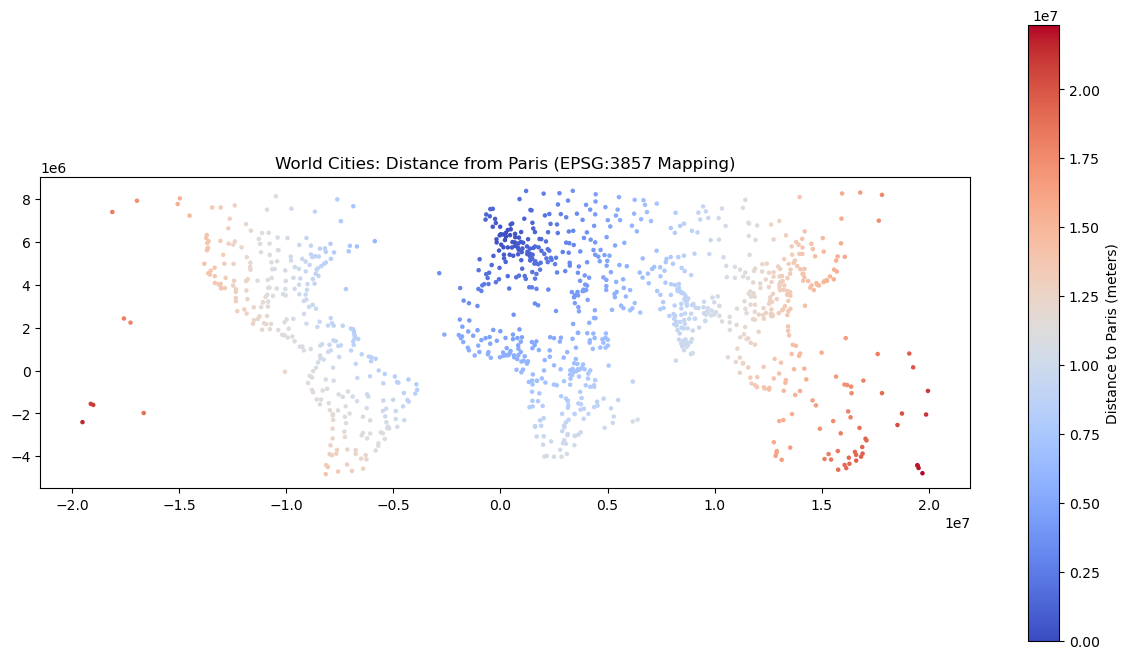

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
gdf_3857.plot(column='dist_to_paris', ax=ax, cmap='coolwarm', legend=True, 
              legend_kwds={'label': "Distance to Paris (meters)"}, markersize=5)

plt.title("World Cities: Distance from Paris (EPSG:3857 Mapping)")
plt.show()